<div style="border:solid Chocolate 2px; padding: 40px">

<b>Александр, привет!👋</b>

Меня зовут Ольга Бессолицына, тимлид, я буду проверять эту (как наверное и все) части твоего проекта. 

Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 

Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий тимлида <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий тимлида <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>

### Введение

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

### Описание услуг

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).  

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

### Описание данных

Данные состоят из файлов, полученных из разных источников:

- `contract.csv` — информация о договоре;
- `personal.csv` — персональные данные клиента;
- `internet.csv` — информация об интернет-услугах;
- `phone.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
 Молодец, что не забываешь про заголовок и описание, это важно, так и самому удобнее работать, когда они всегда на виду, так и другим будет проще понять, что происходит в твоей тетради :)
</div>

### Начало работы

**Заказчик** — Оператор связи «Ниединогоразрыва.ком»

**Цель исследования** 

* Построение модели способной прогнозировать отток клиентов 


**Входные данные**  
* `contract.csv` - информация о договорах
* `personal.csv` - персональная информация клиента
* `internet.csv` - информация по использованию интернет услуг
* `phone.csv` - информация по использованию телефонных услуг 

Информация о договорах актуальна на 1 февраля 2020.

**Результаты исследования** — Получена модель подходящая под требования заказчика (Минимальное значение AUC-ROC >= 0.85, Идеальное значение: AUC-ROC >= 0.88)

**План работы:** [(подробный)](#plan)
* Загрузка и обработка данных.¶
* Исследование модели и данных
* Работа над качеством модели
* Финальное тестирование


In [46]:
#константа используемая в работе
RANDOM_STATE = 281122

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍

### Загрузка и обработка данных.

#### Загрузка библиотек

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OrdinalEncoder


from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

from sklearn.utils import shuffle

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve

from sklearn.dummy import DummyClassifier

!pip install catboost
from catboost import CatBoostClassifier

!pip install lightgbm
import lightgbm as lgb

!pip install phik
import phik
from phik import resources, report

import warnings
warnings.filterwarnings('ignore')

#### Выгрузка данных и их обзор

In [48]:
try:
    contract_df = pd.read_csv('contract.csv')
    personal_df = pd.read_csv('personal.csv')
    internet_df = pd.read_csv('internet.csv')
    phone_df = pd.read_csv('phone.csv')

except FileNotFoundError:
    
    try:
        contract_df = pd.read_csv('/datasets/final_provider/contract.csv')
        personal_df = pd.read_csv('/datasets/final_provider/personal.csv')
        internet_df = pd.read_csv('/datasets/final_provider/internet.csv')
        phone_df = pd.read_csv('/datasets/final_provider/phone.csv')
    
    except FileNotFoundError:    
        print('Файлы не найдены, проверьте правильность указанного пути или отсутствие одного или нескольких файлов.', '\n')

# посмотрю что выходит, возможно нужно загружать с разделителем

try:
    display(contract_df.head())
    display(personal_df.head())
    display(internet_df.head())
    display(phone_df.head())

except NameError:
    print('Данные не выгружены или ошибка в имени.')


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


<div class="alert alert-block alert-danger">
<h2> Комментарий тимлида <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b> ошибка загрузки, у тебя прописаны только локальные пути. Рекомендую использовать конструкцию try-except

<img src="https://emojio.ru/images/apple-b/2705.png" align=left width=44, heigth=44>
<div class="alert alert-info">
    <b>   Мой комментарий rev01</b>

Сделал такую проверку, будет ли достаточно?
</div>

Данные выгружены нормально, посмотрим каждый отдельно и паралелльно преобразуем в snake_case

[Описание](#opisanie_df) каждого поля датафрейма ниже

In [49]:
# изучим датафрейм
# функция для обработки данных датафрейма
def research(df):
    
    #вынес преобразование в snake_case так как работает не корректно, и удобно использовать для проверки новых датафреймов
    #у которых все нормально с названием
    
    display(df.head())
    print()
    print('Информация по таблице:', '\n')
    df.info()
    print()
    print('Количество пропусков:', '\n')
    print(df.isna().sum(), '\n', '\n')
    print('Процент пропусков:', '\n')
    print(df.isna().mean()*100, '\n')

    display(df.describe(include='all'))
    print()
    print('Число явных дубликатов:', df.duplicated().sum(), '\n')


In [50]:
contract_df.columns = contract_df.columns.str.replace(r"([A-Z])", r" \1").str.lower().str.replace(' ', '_').str[1:]
contract_df = contract_df.rename(columns = {'ustomer_i_d': 'customer_id'}) 
#почему-то если переименовать вначале в "Сustomer_Id", стирает "C"
research(contract_df)


,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65



Информация по таблице: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB

Количество пропусков: 

customer_id          0
begin_date           0
end_date             0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
dtype: int64 
 

Процент пропусков: 

customer_id          0.0
begin_date           0.0
end_date             0.0
type        

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
count,7043,7043,7043,7043,7043,7043,7043.000000,7043
unique,7043,77,5,3,2,4,NaN,6531
top,7590-VHVEG,2014-02-01,No,Month-to-month,Yes,Electronic check,NaN,
freq,1,366,5174,3875,4171,2365,NaN,11
mean,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN



Число явных дубликатов: 0 



In [51]:
print('Тип договора: ежемесячный, годовой, двухгодичный:')
print(contract_df['type'].value_counts(), '\n')

print('Факт выставления счёта на электронную почту:')
print(contract_df['paperless_billing'].value_counts(), '\n')

print('Способ оплаты:')
print(contract_df['payment_method'].value_counts(), '\n')

print('Дата окончания пользования услугами:')
print(contract_df['end_date'].value_counts(), '\n')

Тип договора: ежемесячный, годовой, двухгодичный:
Month-to-month    3875
Two year          1695
One year          1473
Name: type, dtype: int64 

Факт выставления счёта на электронную почту:
Yes    4171
No     2872
Name: paperless_billing, dtype: int64 

Способ оплаты:
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: payment_method, dtype: int64 

Дата окончания пользования услугами:
No                     5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: end_date, dtype: int64 



**Промежуточный вывод:**

7043 строк данных, пропусков и повторов нет. Кажется странным ограничение end_date

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> хорошо, по end_date комментарии ниже

In [52]:
personal_df = personal_df.rename(columns = {'gender': 'Gender'})
personal_df.columns = personal_df.columns.str.replace(r"([A-Z])", r" \1").str.lower().str.replace(' ', '_').str[1:]
personal_df = personal_df.rename(columns = {'ustomer_i_d': 'customer_id'}) 
research(personal_df)


,customer_id,gender,senior_citizen,partner,dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No



Информация по таблице: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     7043 non-null   object
 1   gender          7043 non-null   object
 2   senior_citizen  7043 non-null   int64 
 3   partner         7043 non-null   object
 4   dependents      7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB

Количество пропусков: 

customer_id       0
gender            0
senior_citizen    0
partner           0
dependents        0
dtype: int64 
 

Процент пропусков: 

customer_id       0.0
gender            0.0
senior_citizen    0.0
partner           0.0
dependents        0.0
dtype: float64 



,customer_id,gender,senior_citizen,partner,dependents
count,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2
top,7590-VHVEG,Male,NaN,No,No
freq,1,3555,NaN,3641,4933
mean,NaN,NaN,0.162147,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN



Число явных дубликатов: 0 



In [53]:
print('Пол')
print(personal_df['gender'].value_counts(), '\n')

print('Partner')
print(personal_df['partner'].value_counts(), '\n')

print('Dependents')
print(personal_df['dependents'].value_counts(), '\n')

Пол
Male      3555
Female    3488
Name: gender, dtype: int64 

Partner
No     3641
Yes    3402
Name: partner, dtype: int64 

Dependents
No     4933
Yes    2110
Name: dependents, dtype: int64 



**Промежуточный вывод:**

7043 строк данных (количество совпадает с первой), пропусков и повторов нет

In [54]:
internet_df = internet_df.rename(columns = {'StreamingTV': 'StreamingTv'})
internet_df.columns = internet_df.columns.str.replace(r"([A-Z])", r" \1").str.lower().str.replace(' ', '_').str[1:]
internet_df = internet_df.rename(columns = {'ustomer_i_d': 'customer_id'}) 
research(internet_df)


,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No



Информация по таблице: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        5517 non-null   object
 1   internet_service   5517 non-null   object
 2   online_security    5517 non-null   object
 3   online_backup      5517 non-null   object
 4   device_protection  5517 non-null   object
 5   tech_support       5517 non-null   object
 6   streaming_tv       5517 non-null   object
 7   streaming_movies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB

Количество пропусков: 

customer_id          0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
dtype: int64 
 

Процент пропусков: 

customer_id          0.0
internet_service     0.0
online_security      0.0
online_backup        0.0
device_pr

,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7590-VHVEG,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785



Число явных дубликатов: 0 



In [55]:
internet_df.head()

,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


**Промежуточный вывод:**

5517 строк данных (количество **не совпадает** с первой), пропусков и повторов нет

In [56]:
phone_df.columns = phone_df.columns.str.replace(r"([A-Z])", r" \1").str.lower().str.replace(' ', '_').str[1:]
phone_df = phone_df.rename(columns = {'ustomer_i_d': 'customer_id'}) 
research(phone_df)


,customer_id,multiple_lines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes



Информация по таблице: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     6361 non-null   object
 1   multiple_lines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB

Количество пропусков: 

customer_id       0
multiple_lines    0
dtype: int64 
 

Процент пропусков: 

customer_id       0.0
multiple_lines    0.0
dtype: float64 



,customer_id,multiple_lines
count,6361,6361
unique,6361,2
top,5575-GNVDE,No
freq,1,3390



Число явных дубликатов: 0 



**Промежуточный вывод:**

6361 строк данных (количество **не совпадает** с первой), пропусков и повторов нет

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> хорошо, первичный анализ сделан

#### Описание полей данных

**Описание полей данных:**
<a id='opisanie_df'></a>

Объединящий:
* `customerID` - код клиента.

Подробно по каждому датафрейму:
* Сontract:
    * ```BeginDate``` – дата начала пользования услугами,
    * ```EndDate``` – дата окончания пользования услугами,
    * ```Type``` – тип договора: ежемесячный, годовой и т.д,
    * ```PaperlessBilling``` – факт выставления счёта на электронную почту,
    * ```PaymentMethod``` – способ оплаты,
    * ```MonthlyCharges``` – ежемесячные траты на услуги,
    * ```TotalCharges``` – всего потрачено денег на услуги.


* Personal: 
    * `Gender` - Пол
    * `Senior Citizen` – наличие пенсионного статуса по возрасту,
    * `Partner` – наличие супруга(и)
    * `Dependents` – наличие иждивенцев.


* Internet:  
    * `InternetService` - Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line, «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic)
    * `OnlineSecurity` - блокировка небезопасных сайтов
    * `OnlineBackup` - облачное хранилище файлов для резервного копирования данных
    * `DeviceProtection` - антивирус
    * `TechSupport` - выделенная линия технической поддержки
    * `StreamingTV` - стриминговое телевидение
    * `StreamingMovies` - каталог фильмов
 
 
* Phone:
    * `MultipleLines` – наличие возможности ведения параллельных линий во время звонка.
    
    
    


**Итог:**

Общее:
* наименование полей было преобразовано в snake_case
* пропусков и повторов нет
* аномалии не обнаружены
* В процессе объединения таблиц стоит учесть, что в таблице Phone и Internet меньше строк данных, а значит пользователи не пользовались данными услугами, их нельзя отсекать.
* Определение признаков будет сформировано (скорректированно) в процессе исследования
* Целевой признак: формируется из EndDate в случае наличия даты 1 (отвалился) или 0 (клиент)

Сontract_df:
* Необходимо преобразовать BeginDate и EndDate в формат даты после получения нового столбца (целевого признака) для построения времени жизни



<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍</b>

<a id='plan'></a>
### ПЛАН:


#### Загрузка и обработка данных.
Выгрузка данных, предварительный анализ *(сделано на данном этапе)*. Преоборазование данных и их сведение в единый датафрейм, удаление излишней информации. Визуализация данных. 

#### Исследование модели и данных
Обработка типов признаков и подготовка к их к обучению. Исследование баланса классов, обучить модель без учета дисбаланса и изучить полученные результаты.

#### Работа над качеством модели
Улучшение качества модели, учитывая дисбаланс классов. Обучение разных моделей и поиск лучшей.

#### Финальное тестирование
Получение модели подходящие под требования задания


<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> хорошо, план принимается!) Можно еще указать какую метрику используешь в работе

### Вопросы

Уточняющие вопросы у источника данных:
* При формировании (выгрузки данных) не было ли ограничения на EndDate (end_date)? так как всего 4 месяца с 10.21 по 01.22 (кажется подозрительным, так как первая регистрация с 2014-02-01)
* Senior Citizen - *наличие пенсионного статуса по возрасту* Данный статус изменяемый? Возможно ли получить дату простановки данного флага (пользователь мог не иметь его в начале заключения договора)

Вопросы по работе:
* НЕТ ВОПРОСОВ!



<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
1) заказчик оъясняет это тем, что ранее статистику по ушедшим клиентам не собирали и только с ростом оттока начали формировать данные. Плюс заказчику интересны текущие тенденции, поэтому они передали максимально приближенные к текущему состоянию данные по ушедшим клиентам. Поэтому работает с тем, что имеем :)
    
2) На этапе прототипа данные дополняться не будут, пока нужно показать можно ли на этих данных получить что-то адекватное по качеству. Если была бы дальнейшая работа с заказчиком, то тогда уже можно было бы поговорить о выгрузке доп. информации

<div style="border:solid Chocolate 2px; padding: 40px"><h2>✔️ Заключение тимлида: <a class="tocSkip"> </h2> 
    
<b>Александр</b>, план хороший, принимается) Этот этап приму, но обязательно на след итерации нужно исправить загрузку данных, можно приступать к коду

### Обработка данных

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Александр, привет! Начинаю проверять отсюда, версии комментариев обнуляю)

#### Подготовка целевого признака и форматирование данных

In [57]:
#создание целевого признака
contract_df['exited'] = 1
contract_df.loc[contract_df['end_date'] == 'No', 'exited'] = 0
contract_df['exited'] = contract_df['exited'].astype('bool')

contract_df.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,exited
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,False
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,False
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,True
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,False
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,True


<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> таргет выделен верно

In [58]:
#создадим новый столбец с датой, чтобы не ломать исходный, вдруг еще пригодится


contract_df['date_end']= contract_df['end_date'].replace('No', '2020-02-01')
contract_df['begin_date']= pd.to_datetime(contract_df['begin_date'], format='%Y-%m-%d')
contract_df['end_date']= pd.to_datetime(contract_df['end_date'], format='%Y-%m-%d',errors='coerce')

print('Добавление date_end (даты в формате даты)')
contract_df.head()


Добавление date_end (даты в формате даты)


,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,exited,date_end
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85,False,2020-02-01
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.5,False,2020-02-01
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,True,2019-12-01 00:00:00
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1840.75,False,2020-02-01
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,True,2019-11-01 00:00:00


<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> хорошо

In [59]:
# Пропусков у нас конечно нету, но есть ' ' поэтому, чтобы преобразовать в числа необходимо в них проставить значения. 
# В случае если у пользователя не проставилась, сумма, возьмем значение из стоимости тарифа (скорее всего новый пользователь)

contract_df.loc[contract_df['total_charges'] == ' ', 'total_charges'] = contract_df['monthly_charges']
contract_df['total_charges'] = contract_df['total_charges'].astype('float')
contract_df.head()


,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,exited,date_end
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85,False,2020-02-01
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.50,False,2020-02-01
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,True,2019-12-01 00:00:00
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1840.75,False,2020-02-01
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,True,2019-11-01 00:00:00


<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> ок, согласна. Хорошее решение для заполнения пропусков

In [60]:
# Посчитаем количество дней активности пользователя
contract_df['date_end']= pd.to_datetime(contract_df['date_end'], format='%Y-%m-%d',errors='coerce')

oneday = pd.Timedelta(days=1) #чтобы убрать Дней и преобразовать в число
contract_df['life_day'] = (contract_df['date_end']- contract_df['begin_date']) / oneday
contract_df['life_day'] = contract_df['life_day'].astype('int')

display(contract_df.head())
contract_df.info()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,exited,date_end,life_day
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85,False,2020-02-01,31
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.50,False,2020-02-01,1036
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,True,2019-12-01,61
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1840.75,False,2020-02-01,1371
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,True,2019-11-01,61


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           1869 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
 8   exited             7043 non-null   bool          
 9   date_end           7043 non-null   datetime64[ns]
 10  life_day           7043 non-null   int32         
dtypes: bool(1), datetime64[ns](3), float64(2), int32(1), object(4)
memory usage: 529.7+ KB


#### Объединение данных и финальная обработка

In [61]:
#Объединяем данные в один датафрейм
df = contract_df.merge(personal_df, on='customer_id', how='left')
df = df.merge(phone_df, on='customer_id', how='left')
df = df.merge(internet_df, on='customer_id', how='left')


<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> объединение верное

In [62]:
research(df)

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,exited,date_end,...,partner,dependents,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85,False,2020-02-01,...,Yes,No,NaN,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.50,False,2020-02-01,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,True,2019-12-01,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1840.75,False,2020-02-01,...,No,No,NaN,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,True,2019-11-01,...,No,No,No,Fiber optic,No,No,No,No,No,No



Информация по таблице: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           1869 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
 8   exited             7043 non-null   bool          
 9   date_end           7043 non-null   datetime64[ns]
 10  life_day           7043 non-null   int32         
 11  gender             7043 non-null   object        
 12  senior_citizen     7043 non-null   int64         
 13  partner            7043 non-null   ob

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,exited,date_end,...,partner,dependents,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
count,7043,7043,1869,7043,7043,7043,7043.000000,7043.000000,7043,7043,...,7043,7043,6361,5517,5517,5517,5517,5517,5517,5517
unique,7043,77,4,3,2,4,NaN,NaN,2,5,...,2,2,2,2,2,2,2,2,2,2
top,7590-VHVEG,2014-02-01 00:00:00,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,NaN,NaN,False,2020-02-01 00:00:00,...,No,No,No,Fiber optic,No,No,No,No,No,No
freq,1,366,485,3875,4171,2365,NaN,NaN,5174,5174,...,3641,4933,3390,3096,3498,3088,3095,3473,2810,2785
first,NaN,2013-10-01 00:00:00,2019-10-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-01 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2020-02-01 00:00:00,2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-01 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2279.798992,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2266.730170,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,398.550000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Число явных дубликатов: 0 



In [63]:
# Заполняем все пропуски после объединения, так как пользователь может использовать только одну из услуг 

for i in ['multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']:
    df[i] = df[i].fillna('No')

# end_date вернем No
df['end_date'] = df['end_date'].fillna('No')
    
print('Процент пропусков:')
print('------------------------------')
print(df.isna().mean()*100, '\n' )

Процент пропусков:
------------------------------
customer_id          0.0
begin_date           0.0
end_date             0.0
type                 0.0
paperless_billing    0.0
payment_method       0.0
monthly_charges      0.0
total_charges        0.0
exited               0.0
date_end             0.0
life_day             0.0
gender               0.0
senior_citizen       0.0
partner              0.0
dependents           0.0
multiple_lines       0.0
internet_service     0.0
online_security      0.0
online_backup        0.0
device_protection    0.0
tech_support         0.0
streaming_tv         0.0
streaming_movies     0.0
dtype: float64 



<div class="alert alert-warning">
    <h2> Комментарий тимлида <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> чем тогда отличается Na и No? Тогда получается, что бинарные признаки стали категориальными.

<img src="" align=left width=44, heigth=44>
<div class="alert alert-info">
    <b>   Мой комментарий rev02</b>

Na - Not Applicable
</div>

<div class="alert alert-success">
<h2> Комментарий тимлида 2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> ок

#### Обзор данных

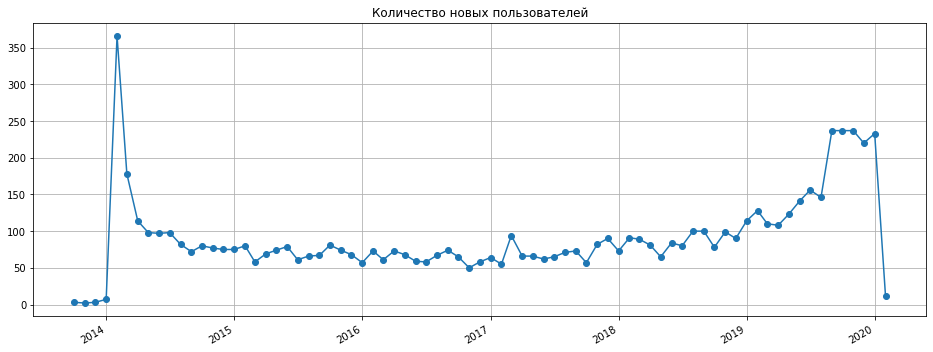

In [64]:
df['begin_date'].value_counts().plot(style='o-', grid=True,figsize=(16, 6))
plt.title("Количество новых пользователей")
plt.show()

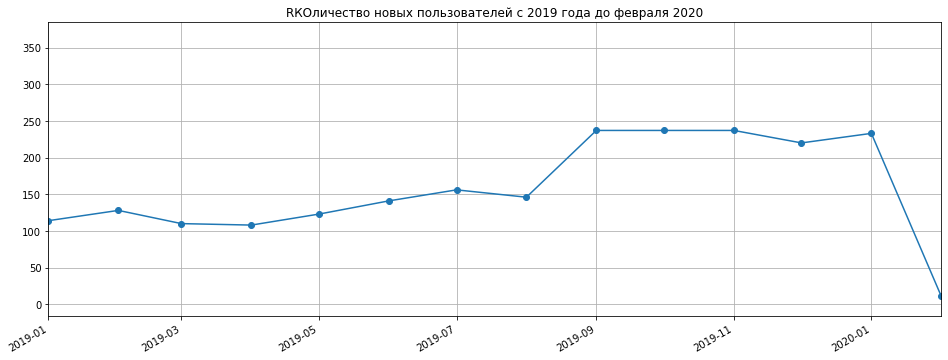

In [65]:
df['begin_date'].value_counts().plot(style='o-',xlim = ('2019', '2020-02'), grid=True,figsize=(16, 6))
plt.title("RКОличество новых пользователей с 2019 года до февраля 2020")
plt.show()

**Промежуточный вывод:**

Можно заметить сильный скачек пользвоателей в начале 15 года, а так же в середине 2019 года. Остальные годы остаются в канале (уровень поддержки 50 пользователей, сопротивление 100) в конце 2018 года число пользователей переваливается за 100. Можем заметить что 02.2020 года, идет сильное падение, скорее всего данные за февраль не финальные (возможно не выгрузились, или скачивались не на конец месяца)

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> согалсна, возможно не все пользователи обновлены

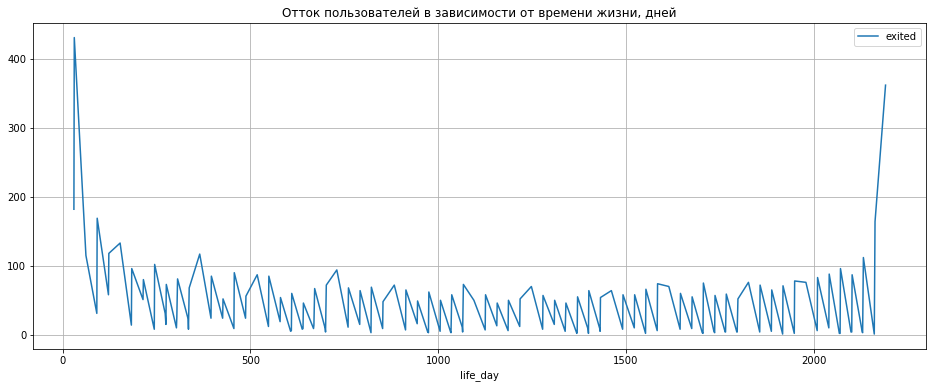

In [66]:

df.pivot_table(values = 'exited', index ='life_day', aggfunc='count').query('life_day > 0').plot(style='-', grid=True,figsize=(16, 6))
plt.title("Отток пользователей в зависимости от времени жизни, дней")
plt.show()


**Промежуточный вывод:**

График получается пилообразный, возможно стоит лучше сделать по месяцам, но в целом можно заметить, что много пользователей отваливается в начале жизни, а так же что удивительно отваливается при использовании услуг оператора более 2000 (~2500) дней, около 7 лет. (теряем старичков :( )


<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> хорошо, можно также сделать анализ портрета типовых клиент (кто ушел и кто остался). Вывести графики в разрезе таргета

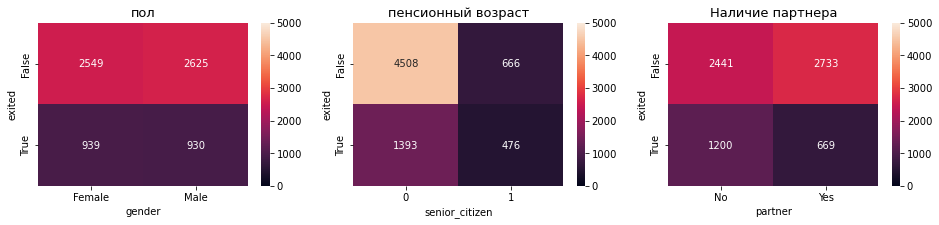

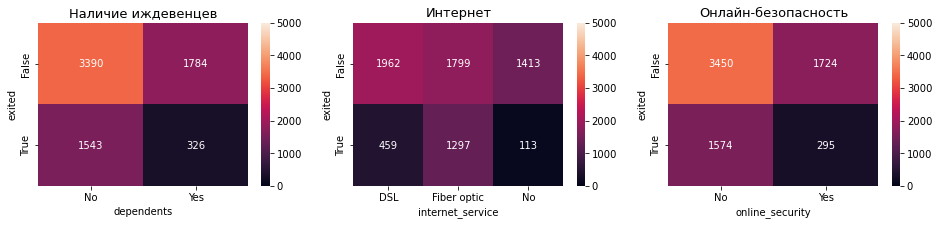

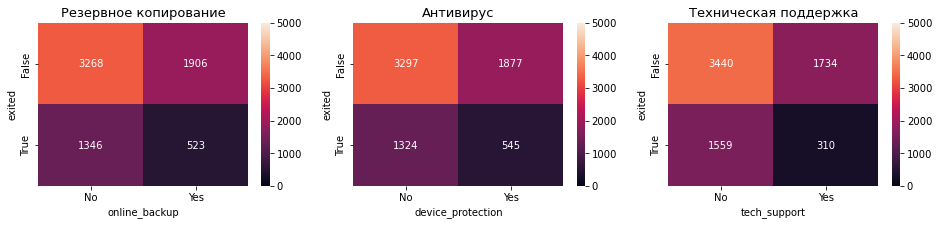

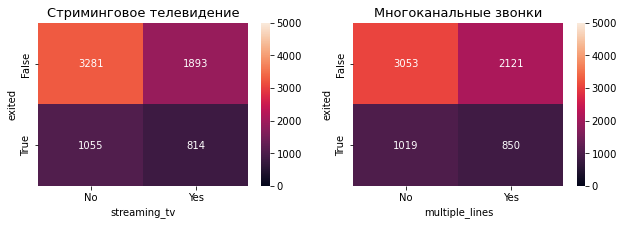

In [67]:
list = {'gender': 'пол',
        'senior_citizen': 'пенсионный возраст',
        'partner': 'Наличие партнера',
        'dependents': 'Наличие иждевенцев',
        'internet_service': 'Интернет',
        'online_security': 'Онлайн-безопасность',
        'online_backup': 'Резервное копирование',
        'device_protection': 'Антивирус',
        'tech_support': 'Техническая поддержка',
        'streaming_tv': 'Стриминговое телевидение',
        'multiple_lines': 'Многоканальные звонки'  
}


n = 1
plt.figure(figsize=(16,3))
for i in list.keys():
    if n % 4 == 0:
        plt.figure(figsize=(16,3))
        n = 1
    plt.subplot(1, 3, n)
    corr_matrix = sns.heatmap(df.groupby(['exited', i]).size().unstack(fill_value=0),
                             vmin=0, vmax=5000, annot=True, fmt=".0f")
    corr_matrix.axes.set_title(list[i], fontsize=13)
    n += 1

**Итог:**

Общее:
* Создан целевой признак
* Объединены данных, преобразование в единый датафрейм
* Очистка и обработка данных (заполнение пропусков)
* Созданы дополнительные признаки
* Удалим признаки `begin_date` и `end_date`, так как есть аналоги.
* Обнаружены два скачка пользователей
* Не только новенькие перестают пользоваться, но и старички активно отваливаются.


### Обучение

#### Подготовка базы

#удалим не актуальные столбцы
df_ohe = df.drop(['begin_date', 'end_date', 'customer_id', 'date_end'], axis=1)

#Применю one hot encoding к датафрейму, избежав "ловушку фиктивных признаков"
df_ohe=pd.get_dummies(df_ohe, drop_first=True)
display(df_ohe.head())

#Вычленяю в список числовые столбцы
numeric = ['monthly_charges','total_charges','life_day']


<a id='start'></a>
**Меняю подход к кодировке, создаю версию 02**


In [68]:
#удаляю не актуальные столбцы
df_ohe = df.drop(['begin_date', 'end_date', 'customer_id', 'date_end'], axis=1)

rev02_df = df_ohe

# извлекаем признаки и целевой признак
rev02_target = rev02_df['exited']
rev02_features = rev02_df.drop('exited', axis=1)

# Создаю выборку под использование кросс-валидации
rev02_features_train, rev02_features_test, rev02_target_train, rev02_target_test = train_test_split(
    rev02_features, rev02_target, test_size=0.25, stratify=rev02_target, random_state=RANDOM_STATE)

print('Обучающая база:')
print('Колличество - признак:', rev02_features_train.shape)
print('Колличество - целевой признак:', rev02_target_train.shape, '\n')

print('Тестовая база:')
print('Колличество - признак:', rev02_features_test.shape)
print('Колличество - целевой признак:', rev02_target_test.shape, '\n')


Обучающая база:
Колличество - признак: (5282, 18)
Колличество - целевой признак: (5282,) 

Тестовая база:
Колличество - признак: (1761, 18)
Колличество - целевой признак: (1761,) 



In [69]:
# И использую прямое кодирование OHE

rev02_features_train_OHE = pd.get_dummies(rev02_features_train, drop_first=True)
rev02_features_test_OHE = pd.get_dummies(rev02_features_test, drop_first=True)

display(rev02_features_train_OHE.head())
display(rev02_features_test_OHE.head())

,monthly_charges,total_charges,life_day,senior_citizen,type_One year,type_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,...,dependents_Yes,multiple_lines_Yes,internet_service_Fiber optic,internet_service_No,online_security_Yes,online_backup_Yes,device_protection_Yes,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes
4215,108.20,7840.60,2191,0,0,1,1,0,1,0,...,0,1,1,0,0,1,1,1,1,1
646,45.70,45.70,30,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1541,19.85,1434.10,2191,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5870,25.90,135.00,153,0,0,0,1,0,0,0,...,1,1,0,1,0,0,0,0,0,0
6251,19.25,19.25,31,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0


,monthly_charges,total_charges,life_day,senior_citizen,type_One year,type_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,...,dependents_Yes,multiple_lines_Yes,internet_service_Fiber optic,internet_service_No,online_security_Yes,online_backup_Yes,device_protection_Yes,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes
1558,95.60,1555.65,487,0,0,0,1,1,0,0,...,0,1,1,0,0,1,1,0,0,1
3020,34.05,1113.95,1006,0,1,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
3845,73.90,280.85,122,0,0,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0
423,25.70,1110.50,1340,0,1,0,0,0,0,1,...,1,1,0,1,0,0,0,0,0,0
95,78.95,927.35,365,0,0,0,1,0,1,0,...,0,1,1,0,1,0,0,0,0,0


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий тимлида <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
Стоит кодировать после разбиения на выборки (чтобы избежать утечки) Что, если придут новые тестовые данные? Как будем кодировать? А если в них новое значение какого-то признака? А если другое количество уникальных значений признака? 
    
То есть нужно перенести это после train_test_split и сделать отдельно для train и для test.
    
Если для кодирования используешь get_dummies, то стоит после кодирования проверять порядок и наличие всех колонок в обучающей и тестовой выборке, чтобы избежать проерки можно использовать OneHotEncoder

<img src="https://emojio.ru/images/apple-b/2705.png" align=left width=44, heigth=44>
<div class="alert alert-info">
    <b>   Мой комментарий rev02</b>

Done
    
[Начало изменений](#start)
</div>

<div class="alert alert-success">
<h2> Комментарий тимлида 2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> теперь верно

#### Анализ корреляции

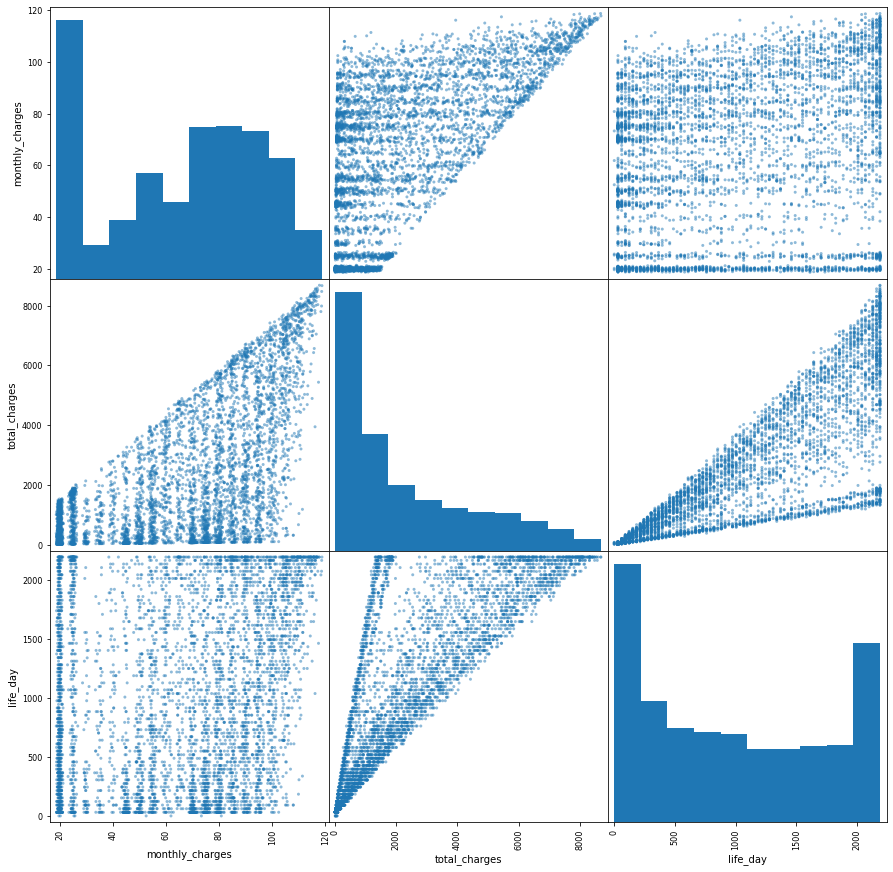

In [70]:
#Проверю на наличие ложной корреляции
numeric = ['monthly_charges','total_charges','life_day']
pd.plotting.scatter_matrix(rev02_features_train_OHE.loc[:,numeric],figsize=(15,15))
plt.show()

corrMatrix = rev02_features_train_OHE.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corrMatrix, annot=False)

interval columns not set, guessing: ['monthly_charges', 'total_charges', 'life_day', 'senior_citizen', 'type_One year', 'type_Two year', 'paperless_billing_Yes', 'payment_method_Credit card (automatic)', 'payment_method_Electronic check', 'payment_method_Mailed check', 'gender_Male', 'partner_Yes', 'dependents_Yes', 'multiple_lines_Yes', 'internet_service_Fiber optic', 'internet_service_No', 'online_security_Yes', 'online_backup_Yes', 'device_protection_Yes', 'tech_support_Yes', 'streaming_tv_Yes', 'streaming_movies_Yes']


<AxesSubplot:>

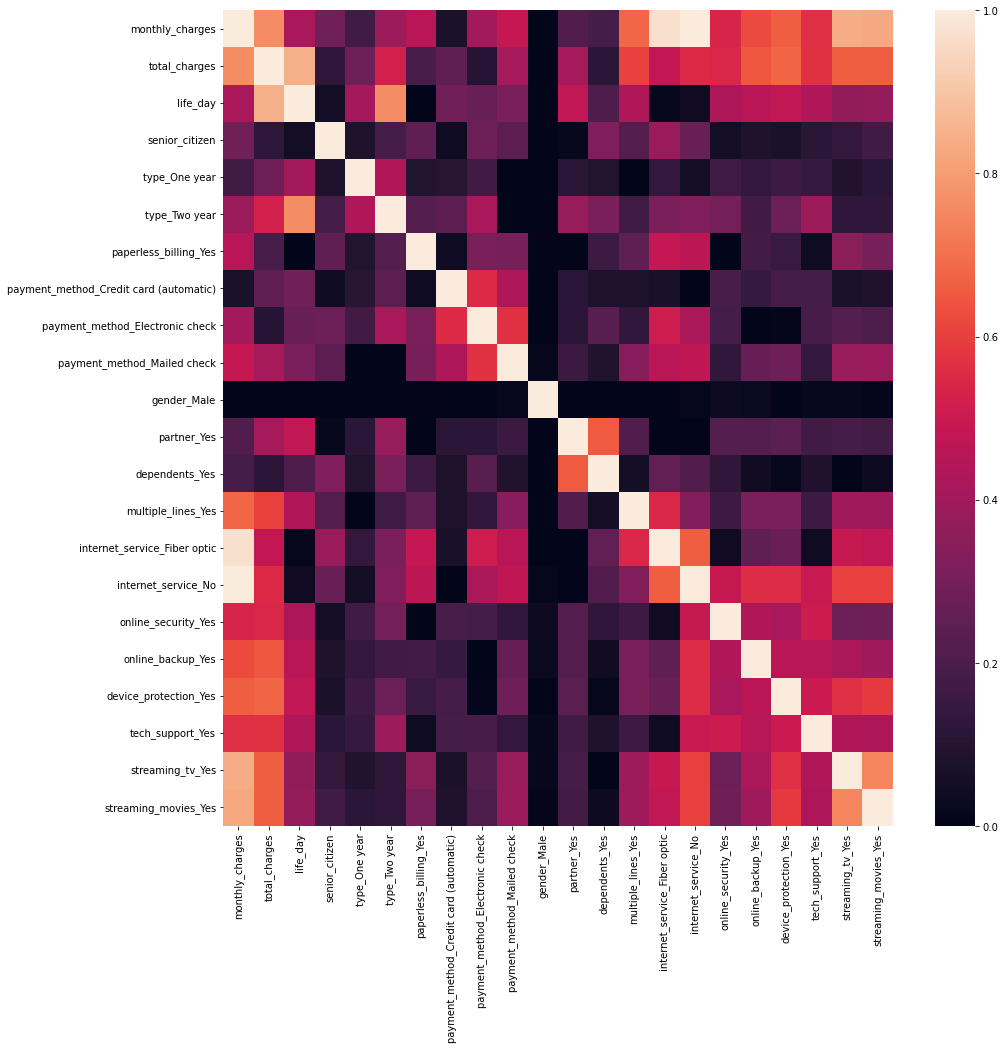

In [71]:
#Построение корреляции с помощью библиотеки Phi_k

#rev02_features_train_OHE.significance_matrix()

phikMatrix = rev02_features_train_OHE.phik_matrix()
plt.figure(figsize=(15, 15))
sns.heatmap(phikMatrix)

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий тимлида <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b> 
    
Корреляции Пирсона имеют смысл только для количественных признаков. Если категориальный закодирован числом, мы можем для него и какого-то другого признака со значениями-числами рассчитать к-т, но смысла он иметь не будет.  По корреляциям советую почитать <a href='https://github.com/hukenovs/coursera_ml_da_specialization/blob/master/C4_Stats_for_data_analysis/Lectures/3-2.Korrelyacii.pdf'>конспект из специализации Яндекса и МФТИ с Coursera</a>. Если нам нужно проанализировать к-ты корреляции Пирсона, то исключи при этом категориальные столбцы, оставив только численные.
    
Для числовых признаков - можно смотреть обычную корреляцию Пирсона.
        
Для бинарных признаков есть коэффициент фи, как мера связи двух бинарных переменных, <a href='https://en.wikipedia.org/wiki/Phi_coefficient'>про него здесь</a>.
        
Можно также посмотреть фи-корреляцию для смешанного набора признаков, <a href='
https://towardsdatascience.com/phik-k-get-familiar-with-the-latest-correlation-coefficient-9ba0032b37e7#:~:text=Phik%20(%F0%9D%9C%99k)%20is%20a%20new,a%20bivariate%20normal%20input%20distribution'>про него здесь</a>.
        
Но проще использовать библиотеку Phik - она позволяет легко рассчитать корреляцию и числовых и бинарных и категориальных признаков, <a href='https://pypi.org/project/phik/'>советую использовать этот модуль</a>.

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий тимлида 2<a class="tocSkip"></h2>

    
<b>На доработку🤔:</b> теперь совсем нет анализа корреляции, нужно добавить

<img src="https://emojio.ru/images/apple-b/2705.png" align=left width=44, heigth=44>
<div class="alert alert-info">
    <b>   Мой комментарий rev02</b>

У матрицы рассеивания использую только числовые данные, так же добавил корреляцию по phik
</div>

<div class="alert alert-success">
<h2> Комментарий тимлида 3<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> все таки эта разное) Хорошо, чтодобавил анализ через Phik.
        
На будущее, полезные ссылки - проверка важности признаков по модели это только один из способов (корреляция в том числе). Используют также аналитические методы проверки гипотез. 

Есть несколько инструментов для отбора признаков, подробнее можно посмотреть в данной статье (Отбор признаков в задачах машинного обучения): https://habr.com/ru/post/550978/

В библиотеке sklearn есть методы mutual_info_regression и mutual_info_classif соответственно для регрессии и классификации.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif

#old Обучение

#извлеку признаки и целевой признак
target = df_ohe['exited']
features = df_ohe.drop('exited', axis=1)

#Разбиваю исходные данные в соотношении 3:1:1. 
#Вначале на обучающую 60% и валид+тестовая 40%
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target,  test_size=0.40, random_state=RANDOM_STATE)

#валид+тестовая делю пополам 
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid,  test_size=0.50, random_state=RANDOM_STATE)



print('Обучающая база:')
print('Колличество - признак:', features_train.shape)
print('Колличество - целевой признак:', target_train.shape, '\n')

print('Валидационная база:')
print('Колличество - признак:', features_valid.shape)
print('Колличество - целевой признак:', target_valid.shape, '\n')

print('Тестовая база:')
print('Колличество - признак:', features_test.shape)
print('Колличество - целевой признак:', target_test.shape, '\n')


<div class="alert alert-warning">
    <h2> Комментарий тимлида <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> тк у в данных дисбаланс, то рекомендую использовать атрибут stratify - он позволит разбить данные на трайн и тест при этом сохранив баланс классов.
        
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

<div class="alert alert-success">
<h2> Комментарий тимлида 2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> отлично, что добавил

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий тимлида <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b> Рекомендую использовать кросс-валидацию, для нее валидационная выборка лишняя (https://academy.yandex.ru/handbook/ml/article/kross-validaciya). У нас мало данных, а кросс-валидация поможет и проще пербрать гиперпараметры и сохранить объем данных.
    
test_size=0.25 (для чистоты сравнения полученных метрик, у всех студентов одинаковый объем тестовой выборки).

<img src="https://emojio.ru/images/apple-b/2705.png" align=left width=44, heigth=44>
<div class="alert alert-info">
    <b>   Мой комментарий rev02</b>

Done
    
[Начало изменений](#start)
</div>

<div class="alert alert-success">
<h2> Комментарий тимлида 2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> хорошо, сейчас посмотрим:)

In [72]:
#Вычленяю в список числовые столбцы 
numeric = ['monthly_charges','total_charges','life_day']

#Привожу численные признаки к одному масштабу.
scaler = StandardScaler()
scaler.fit(rev02_features_train_OHE[numeric])
rev02_features_train_OHE[numeric] = scaler.transform(rev02_features_train_OHE[numeric])
rev02_features_test_OHE[numeric] = scaler.transform(rev02_features_test_OHE[numeric])

print(rev02_features_train_OHE.shape)
print(rev02_features_test_OHE.shape)

#Проверяю баланс
rev02_features[rev02_target == 0].shape, rev02_features[rev02_target == 1].shape

(5282, 22)
(1761, 22)


((5174, 18), (1869, 18))

Можно обратить внимание, что идет перевес почти в 2.7 раза, посмотрим какие результаты получатся на несбланасированной модели.

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

Ок, есть масштабирование. 
    
Масштабирование признаков - важный этап работы в случае если планируешь использовать простые линейные модели. Для более сложных моделей масштабирование наоборот может ухудшить результаты.

#### Несбалансирвоанная модель

#Old version

#логистическая регрессия
model_base_lr = LogisticRegression(random_state=RANDOM_STATE, solver='liblinear')
model_base_lr.fit(features_train, target_train)
prediction = model_base_lr.predict(features_valid)
print("F1:", f1_score(target_valid, prediction))

probabilities_valid = model_base_lr.predict_proba(features_valid)[:, 1]
print("ROC_auc:", roc_auc_score(target_valid, prediction))

#F1: 0.5766016713091923
#ROC_auc: 0.7078568193038441

In [73]:
%%time
skf = StratifiedKFold(n_splits=5)

model_base_lr = LogisticRegression()
model_base_lr.fit(rev02_features_train_OHE, rev02_target_train)
scores = cross_val_score(model_base_lr, rev02_features_train_OHE, rev02_target_train, cv=skf, scoring='neg_root_mean_squared_error').mean()
print("Linear Regression:") 
print("RMSE", scores)
      
roc_auc = cross_val_score(model_base_lr, rev02_features_train_OHE, rev02_target_train, cv=skf, scoring='roc_auc').mean()
print("AUC-ROC:", roc_auc) 

accuracy = cross_val_score(model_base_lr, rev02_features_train_OHE, rev02_target_train, cv=skf, scoring='accuracy').mean()
print("Accuracy", accuracy, '\n') 

#Не очень понимаю тогда как работает, так как после изменения разбивки перестало работать
#probabilities_valid = model_base_lr.predict_proba(rev02_features_test_OHE)[:, 1]
#print("roc_auc_score", roc_auc_score(rev02_target_test, probabilities_valid))




Linear Regression:
RMSE nan
AUC-ROC: 0.8340836839422637
Accuracy 0.7962837934692238 

CPU times: total: 500 ms
Wall time: 522 ms


<div class="alert alert-warning">
    <h2> Комментарий тимлида <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> Было бы очень правильно сделать модели через автоматизированную кросс-валидацию  (GridSearchCV или RandomizedSearchCV; Optuna; OptunaCV…). Через cross_val_score для моделей без подбора гиперпараметров

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий тимлида <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b> 
 roc_auc_score принимает на вход вероятность старшего класса, то есть для верного расчета нужен метод predict_proba, а не  predict. Только для roc_auc_score

<a id='quest01'></a>

<img src="https://i.postimg.cc/7P25q5Nw/image.png" align=left width=44, heigth=44>
<div class="alert alert-info">
    <b>  ⠀Вопрос - Мой комментарий -  rev02</b>


Не очень понимаю тогда как работает, так как после изменения разбивки перестало работать
</div>

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий тимлида 2 <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b> 
    
1) почему LinearRegression? Наверное ты хотел использовать логистическую, у нас ведь задача классификации, а не регрессии. Для LinearRegression действительно нет predict_proba
    
2) тут ты 2 раза выводишь ROC, использование roc_auc_score в последних строчках выглядит излишним

<img src="https://emojio.ru/images/apple-b/2705.png" align=left width=44, heigth=44>
<div class="alert alert-info">
    <b>   Мой комментарий rev03</b>

Разобрался, спасибо. Упустил
    
</div>

<div class="alert alert-success">
<h2> Комментарий тимлида 3<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> хорошо

In [74]:
#Посмотрю как влияет изменение порога
model = LogisticRegression(random_state=RANDOM_STATE, solver='liblinear')
model.fit(rev02_features_train_OHE, rev02_target_train)
probabilities_valid = model.predict_proba(rev02_features_test_OHE)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 1.0, 0.02):
    predicted_valid = probabilities_one_valid > threshold 
    precision = precision_score(rev02_target_test, predicted_valid)
    recall = recall_score(rev02_target_test, predicted_valid)

    print("Порог = {:.2f} | Точность = {:.3f} | Полнота = {:.3f}".format(
        threshold, precision, recall))

Порог = 0.00 | Точность = 0.265 | Полнота = 1.000
Порог = 0.02 | Точность = 0.311 | Полнота = 0.998
Порог = 0.04 | Точность = 0.343 | Полнота = 0.996
Порог = 0.06 | Точность = 0.368 | Полнота = 0.989
Порог = 0.08 | Точность = 0.390 | Полнота = 0.970
Порог = 0.10 | Точность = 0.404 | Полнота = 0.953
Порог = 0.12 | Точность = 0.424 | Полнота = 0.946
Порог = 0.14 | Точность = 0.441 | Полнота = 0.942
Порог = 0.16 | Точность = 0.453 | Полнота = 0.931
Порог = 0.18 | Точность = 0.468 | Полнота = 0.916
Порог = 0.20 | Точность = 0.486 | Полнота = 0.887
Порог = 0.22 | Точность = 0.508 | Полнота = 0.863
Порог = 0.24 | Точность = 0.524 | Полнота = 0.854
Порог = 0.26 | Точность = 0.543 | Полнота = 0.829
Порог = 0.28 | Точность = 0.561 | Полнота = 0.820
Порог = 0.30 | Точность = 0.570 | Полнота = 0.790
Порог = 0.32 | Точность = 0.588 | Полнота = 0.767
Порог = 0.34 | Точность = 0.601 | Полнота = 0.749
Порог = 0.36 | Точность = 0.621 | Полнота = 0.737
Порог = 0.38 | Точность = 0.632 | Полнота = 0.719


**Промежуточный итог:**

Наилучий вариант точности = 0.917 достигается при следующих показателях: 

Порог = 0.78 | Полнота = 0.024


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий тимлида <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b> вывод?

<img src="https://emojio.ru/images/apple-b/2705.png" align=left width=44, heigth=44>
<div class="alert alert-info">
    <b>   Мой комментарий rev02</b>

Done
    
</div>

<div class="alert alert-success">
<h2> Комментарий тимлида 2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> отлично!

<div class="alert alert-warning">
    <h2> Комментарий тимлида <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b>
       
Если добавить в импорты вот такое:  
    
    import warnings
    warnings.filterwarnings('ignore')  
    
То предупреждения исчезнут :)

<img src="https://emojio.ru/images/apple-b/2705.png" align=left width=44, heigth=44>
<div class="alert alert-info">
    <b>   Мой комментарий rev02</b>

Done
</div>

<div class="alert alert-success">
<h2> Комментарий тимлида 2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> теперь блокнот выглядит хорошо, супер

#### Решающее дерево

#OLD VERSION

#решающее дерево
f1_best = 0
depth_best = 0
for depth in range(7, 11):
    model = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=depth)
    model.fit(features_train, target_train)
    prediction = model.predict(features_valid)
    f1 = f1_score(target_valid, prediction)
    if f1 > f1_best:
            f1_best=f1
            depth_best=depth

print('depth', depth_best,':', 'F1-score', f1_best, '\n')


model_dtc = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=depth_best)
model_dtc.fit(features_train, target_train)
prediction = model_dtc.predict(features_valid)
print('Accuracy', accuracy_score(target_valid, prediction))
print('Precision', precision_score(target_valid, prediction))
print('Recall', recall_score(target_valid, prediction))
print('F1', f1_score(target_valid, prediction))

probabilities_valid = model_dtc.predict_proba(features_valid)[:, 1]
print("AUC-ROC", roc_auc_score(target_valid, probabilities_valid))

In [75]:
%%time

skf = StratifiedKFold(n_splits=5)

dtr_model = DecisionTreeClassifier(random_state=RANDOM_STATE)
param_grid = {
    "max_depth" : range(5,15),
    "min_samples_leaf" : range(2,10)
}

gsearch = GridSearchCV(dtr_model, param_grid = param_grid, scoring='roc_auc', cv=skf)
dtr_model = gsearch.fit(rev02_features_train_OHE, rev02_target_train)
print(f'Лучшая AUC-ROC: {dtr_model.best_score_} при параметрах {dtr_model.best_params_}')
print('\n', 'Время выполнения:')

Лучшая AUC-ROC: 0.8349650368319541 при параметрах {'max_depth': 6, 'min_samples_leaf': 2}

 Время выполнения:
CPU times: total: 8.86 s
Wall time: 8.99 s


<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> а вот здесь roc_auc_score посчитан верно

<div class="alert alert-success">
<h2> Комментарий тимлида 2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> по алгоритму верно

#### Случайный Лес

#OLD VERSION

#cлучайный лес

f1_best = 0
estim_best = 0
depth_best = 0

for estim in range (60, 63):
    for depth in range(10, 12):
        model = RandomForestClassifier(n_estimators=estim, max_depth=depth, random_state=RANDOM_STATE)
        model.fit(features_train, target_train)
        prediction = model.predict(features_valid)
        f1 = f1_score(target_valid, prediction)
        if f1>f1_best:
            f1_best=f1
            estim_best=estim
            depth_best=depth
        

print('n_estimators =', estim_best, 'Max depth', depth_best, 'F1-score', f1_best, '\n')

model_rfc = RandomForestClassifier(n_estimators=estim_best, max_depth=depth_best, random_state=RANDOM_STATE)
model_rfc.fit(features_train, target_train)
prediction = model_rfc.predict(features_valid)
print('Accuracy', accuracy_score(target_valid, prediction))
print('Precision', precision_score(target_valid, prediction))
print('Recall', recall_score(target_valid, prediction))
print('F1', f1_score(target_valid, prediction))

probabilities_valid = model_rfc.predict_proba(features_valid)[:, 1]
print("AUC-ROC", roc_auc_score(target_valid, probabilities_valid))


In [76]:
%%time
#REV02

skf = StratifiedKFold(n_splits=5)

model_dt= RandomForestClassifier(random_state=RANDOM_STATE)
param_grid = {
    "max_depth" : range(5,15),
    "min_samples_leaf" : range(2,10)
}
gsearch = GridSearchCV(model_dt, param_grid = param_grid, scoring='roc_auc', cv=skf)
dt_model = gsearch.fit(rev02_features_train_OHE, rev02_target_train)
print(f'Лучшая AUC-ROC: {dt_model.best_score_} при параметрах {dt_model.best_params_}')
print('\n', 'Время выполнения:')

Лучшая AUC-ROC: 0.8501895482942782 при параметрах {'max_depth': 8, 'min_samples_leaf': 2}

 Время выполнения:
CPU times: total: 2min 51s
Wall time: 2min 56s


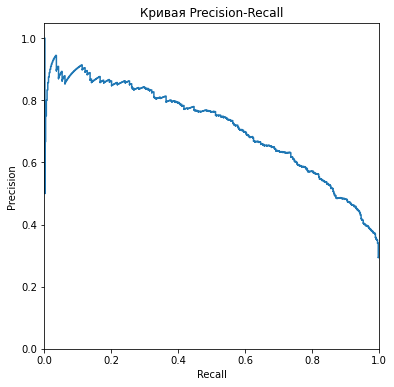

In [77]:
probabilities_valid = model.predict_proba(rev02_features_test_OHE)
precision, recall, thresholds = precision_recall_curve(rev02_target_test, probabilities_valid[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show() 

**Промежуточный итог:**

Модель явно не стабильна, видны как резкие скачки, так и явные провалы, посмотрим на ROC-кривую

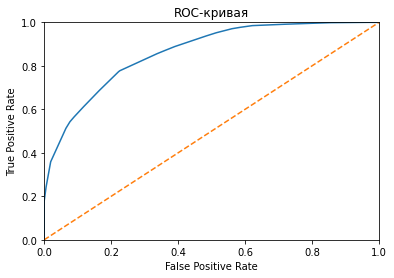

Значение AUC-ROC: 0.8625900775034192


In [78]:
probabilities_valid = dtr_model.predict_proba(rev02_features_train_OHE)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(rev02_target_train, probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr)

# ROC-кривая 
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')
plt.show()

auc_roc = roc_auc_score(rev02_target_train, probabilities_one_valid)
print('Значение AUC-ROC:', auc_roc)

**Промежуточный вывод**

Модель несбалансирована и требует дороботки, была обучена модель на несбалансированной модели - `model_base_lr`
* RMSE = 0.38
* ROC_auc = 0.82

Наилучшая точность = 0.917  достигается при "Порог = 0.78 | Полнота = 0.024"

Наиболее близкая модель к требуемой - `cлучайный лес`

<div class="alert alert-success">
<h2> Комментарий тимлида 2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>хорошо

#### Борьба с дисбалансом

##### Борьба с дисбалансом методом 'balanced'

#создадим табличку в которую будем записывать результаты
total_result = pd.DataFrame(columns = ['model', 'roc_auc_valid', 'recall_valid', 'precision_valid'])

###### Решающее дерево

#OLD VERSION

#решающее дерево

f1_best = 0
depth_best = 0
for depth in range(2, 18): 
    model = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=depth, class_weight='balanced')
    model.fit(features_train, target_train)
    prediction = model.predict(features_valid)
    f1 = f1_score(target_valid, prediction)
    if f1>f1_best:
            f1_best=f1
            depth_best=depth
print('Max depth', depth_best,': F1-score', f1_best, '\n')

#Расчет метрик
model_dtc_b = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=depth_best, class_weight='balanced')
model_dtc_b.fit(features_train, target_train)
prediction = model_dtc_b.predict(features_valid)
print('Accuracy', accuracy_score(target_valid, prediction))
print('Precision', precision_score(target_valid, prediction))
print('Recall', recall_score(target_valid, prediction), '\n')
print('F1', f1_score(target_valid, prediction), '\n')
probabilities_valid = model_dtc_b.predict_proba(features_valid)[:, 1]
print("AUC-ROC", roc_auc_score(target_valid, probabilities_valid))
fpr_dtc, tpr_dtc, thresholds = roc_curve(target_valid, probabilities_valid)

In [79]:
%%time
skf = StratifiedKFold(n_splits=5)

dtc_model_b = DecisionTreeClassifier(
                              random_state=RANDOM_STATE,
                              class_weight='balanced') 
param_grid = {
    "max_depth" : range(5,15),
    "min_samples_leaf" : range(2,11)
}

gsearch = GridSearchCV(dtc_model_b,param_grid = param_grid, scoring='roc_auc', cv=skf)
dtc_model_b = gsearch.fit(rev02_features_train_OHE, rev02_target_train)
print(f'Лучшая AUC-ROC: {dtc_model_b.best_score_} при параметрах {dtc_model_b.best_params_}')

probabilities_valid = dtc_model_b.predict_proba(rev02_features_train_OHE)[:, 1]
print("AUC-ROC-score", roc_auc_score(rev02_target_train, probabilities_valid))
fpr_dtc, tpr_dtc, thresholds = roc_curve(rev02_target_train, probabilities_valid)

print('\n', 'Время выполнения:')

Лучшая AUC-ROC: 0.8326175287868385 при параметрах {'max_depth': 7, 'min_samples_leaf': 5}
AUC-ROC-score 0.8825133829433652

 Время выполнения:
CPU times: total: 9.73 s
Wall time: 9.78 s


###### Случайный лес

#OLD VERSION

#случайный лес
f1_best_rfc = 0
estim_best_rfc = 0
depth_best_rfc = 0

for estim in range (80, 100):
    for depth in range(2, 8):
        model = RandomForestClassifier(n_estimators=estim, max_depth=depth, random_state=RANDOM_STATE, class_weight='balanced')
        model.fit(features_train, target_train)
        prediction = model.predict(features_valid)
        f1 = f1_score(target_valid, prediction)
        if f1>f1_best_rfc:
            f1_best_rfc=f1
            estim_best_rfc=estim
            depth_best_rfc=depth
        

print('n_estimators =', estim_best_rfc, ': Max depth', depth_best_rfc, ': F1-score', f1_best_rfc, '\n')

model_rfc_b = RandomForestClassifier(n_estimators=estim_best, max_depth=depth_best, random_state=RANDOM_STATE, class_weight='balanced')
model_rfc_b.fit(features_train, target_train)
prediction = model_rfc_b.predict(features_valid)
print('Accuracy', accuracy_score(target_valid, prediction))
print('Precision', precision_score(target_valid, prediction))
print('Recall', recall_score(target_valid, prediction), '\n')
print('F1', f1_score(target_valid, prediction), '\n')

probabilities_valid = model_rfc_b.predict_proba(features_valid)[:, 1]
print("AUC-ROC", roc_auc_score(target_valid, probabilities_valid))
fpr_rfc, tpr_rfc, thresholds = roc_curve(target_valid, probabilities_valid)

In [80]:
%%time
#REV02

skf = StratifiedKFold(n_splits=5)

model_rfc= RandomForestClassifier(random_state=RANDOM_STATE, class_weight='balanced')
param_grid = {
    "max_depth" : range(5,15),
    "min_samples_leaf" : range(2,15)
}
gsearch = GridSearchCV(model_rfc, param_grid = param_grid, scoring='roc_auc', cv=skf)
model_rfc = gsearch.fit(rev02_features_train_OHE, rev02_target_train)
print(f'Лучшая AUC-ROC: {model_rfc.best_score_} при параметрах {model_rfc.best_params_}')


probabilities_valid = model_rfc.predict_proba(rev02_features_train_OHE)[:, 1]
print("AUC-ROC-score", roc_auc_score(rev02_target_train, probabilities_valid))
fpr_rfc, tpr_rfc, thresholds = roc_curve(rev02_target_train, probabilities_valid)

print('\n', 'Время выполнения:')

Лучшая AUC-ROC: 0.8502553996614239 при параметрах {'max_depth': 9, 'min_samples_leaf': 4}
AUC-ROC-score 0.9143282975719517

 Время выполнения:
CPU times: total: 4min 35s
Wall time: 4min 44s


###### Логистическая регрессия

#OLD VERSION

#логистическая регрессия
model_lr_b =  LogisticRegression(random_state=RANDOM_STATE, class_weight='balanced')
model_lr_b.fit(features_train, target_train)
prediction = model_lr_b.predict(features_valid)

print('Accuracy', accuracy_score(target_valid, prediction))
print('Precision', precision_score(target_valid, prediction))
print('Recall', recall_score(target_valid, prediction), '\n')
print('F1', f1_score(target_valid, prediction), '\n')
probabilities_valid = model_lr_b.predict_proba(features_valid)[:, 1]
print("AUC-ROC", roc_auc_score(target_valid, probabilities_valid))
fpr_lr, tpr_lr, thresholds = roc_curve(target_valid, probabilities_valid)

In [81]:
%%time
#REV02

model_LR = LogisticRegression(random_state=RANDOM_STATE, class_weight='balanced')
model_LR.fit(rev02_features_train_OHE, rev02_target_train)


scores = cross_val_score(model_LR, rev02_features_train_OHE, rev02_target_train, cv=skf, scoring='neg_root_mean_squared_error').mean()
print("Linear Regression:") 
print("RMSE", scores)
      
roc_auc = cross_val_score(model_LR, rev02_features_train_OHE, rev02_target_train, cv=skf, scoring='roc_auc').mean()
print("AUC-ROC:", roc_auc)

probabilities_valid = model_LR.predict_proba(rev02_features_train_OHE)
probabilities_one_valid = probabilities_valid[:, 1]
fpr_lr, tpr_lr, thresholds = roc_curve(rev02_target_train, probabilities_one_valid)

#probabilities_valid = model_LR.predict_proba(rev02_features_train_OHE)
#probabilities_one_valid = probabilities_valid[:, 1]
#print("AUC-ROC-score", roc_auc_score(rev02_target_train, probabilities_valid))
#fpr_lr, tpr_lr, thresholds = roc_curve(rev02_target_train, probabilities_valid)




Linear Regression:
RMSE nan
AUC-ROC: 0.8338531697624202
CPU times: total: 406 ms
Wall time: 379 ms


<img src="https://i.postimg.cc/7P25q5Nw/image.png" align=left width=44, heigth=44>
<div class="alert alert-info">
    <b>  ⠀Вопрос - Мой комментарий -  rev02</b>


[Повторяется вопрос](#quest01) 
</div>

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий тимлида 2<a class="tocSkip"></h2>

    
<b>На доработку🤔:</b> тут ошибка из-за того, что ты передаешь в roc_auc_score двумерный массив - probabilities_valid, нужен одномерный -probabilities_one_valid. Можно тоже убрать второй roc_auc

<img src="https://emojio.ru/images/apple-b/2705.png" align=left width=44, heigth=44>
<div class="alert alert-info">
    <b>   Мой комментарий rev03</b>

Done
</div>

<div class="alert alert-success">
<h2> Комментарий тимлида 3<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> принято

##### Борьба с дисбалансом методом 'upsample'

#OLD VERSION

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=RANDOM_STATE)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 5)


print('Случайный лес:')
model_rfc_u = RandomForestClassifier(n_estimators=estim_best, max_depth=depth_best, random_state=RANDOM_STATE)
model_rfc_u.fit(features_upsampled, target_upsampled)
prediction = model_rfc_u.predict(features_valid)
print('Accuracy', accuracy_score(target_valid, prediction))
print('Precision', precision_score(target_valid, prediction))
print('Recall', recall_score(target_valid, prediction), '\n')
print('F1', f1_score(target_valid, prediction), '\n')

probabilities_valid = model_rfc_u.predict_proba(features_valid)[:, 1]
print("AUC-ROC", roc_auc_score(target_valid, probabilities_valid))

<div class="alert alert-block alert-danger">
<h2> Комментарий тимлида <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>

в этом проекте обязательна кросс-валидация, из-за дубликатов, которые делаются в этой функции, появляются утечки на кросс-валидации и метрика недостоверна при обучении (завышена). Метрика не чувствительна к дисбалансу, поэтому здесь можно не делать апсемлинг или использовать решения типа SmoteTomek, но лучше даже их применять в пайплайнах.       

В ходе (апсэмплинга) объекты редкого класса копируются несколько раз, чтобы выровнять баланс классов в выборке, которая затем перемешивается. Баланс, по сути, будет выравниваться за счёт исходных объектов-дубликатов редкого класса. Как рекомендация на будущее :)
<br/>
<br/>
<details>
    <summary><u>Сначала вспомним как работает кросс-валидация: (кликабельно)</u></summary>
Данные обучающей выборки делятся на несколько примерно равных частей (блоков, fold'ов)<br/> <img src='https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEiMfL8q7_aOzyLOz5zM7JxQuPCYuvoyvlzymMb289XZzQxzuRGFxg2PEQcnc_FEU4XfQtaYj5uoRnZ7w0MPMetjVUut5aIYeuMlQ-Z-XPFyyH-9Yazp0tOgtv6QIrCJl9jTRLqyDpr2YbbY2eSmvN_EflLGQU9JQBNhAjd0uQ9TBRjND4Nmxgenow-s/s813/folds_validation.png'>
<br/>   
Затем каждый из блоков поочередно используется для валидации, в то время как остальные - для обучения. Таким образом, каждый блок побывает валидационным:
<br/>
<img src='https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEi2ufYeIH1JHerkolJ41BkE1CoHCYGW7230ErKTBBbAGlobmGsHuf9MMgPE6KoUObag8stF4tweqkbE0ok4ALlHrthC4PzbBox-S5uuffLIm88SyVOdS4v_4jQxaKP61Gn9tdt8-n3H1l3anx8h0iSHfBVSFmxyKp8KE5WD7ToNNdFKWtnCD5DJ-m2C/s628/splits_validation.png'>
<br/>
Так как в данных есть множество дубликатов объектов из изначально редкого класса, то есть вероятность, что копии одного объекта будут содержаться в валидационном блоке и обучающих, т.е. произойдёт утечка этого объекты, во время валидации он уже не будет новым для модели, она использовала его для обучения. 
<br/>
</details> 
<br/>  
    
<details>
	<summary><u>Покажу на игрушечном примере, лучше один раз увидеть: (кликабельно)</u></summary>
    
В примере приведена задача классификации текстов, это не столь важно, так как это просто пример, это справедливо для объектов любой природы в задаче классификации. Объекты - некоторые уникальные тексты, которые могут быть токсичными или нет (т.е. целевой признак - бинарный, 0 для нетоксичных текстов и 1 для токсичных). На этом примере я хочу показать, как именно в случае апсэмплинга возникает утечка объектов при кросс-валидации.
    
Генерируем 5 уникальных нетоксичных текстов и 20 токсичных, умышленно создаём дисбаланс
    
```python
    X = ['нетоксичный текст' + str(i) for i in range (1, 21)] + ['токсичный текст' + str(i) for i in range (1, 5)]
    y = [0 if 'нетоксичный' in x else 1 for x in X]
```
    
Обернём фичи в pd.Series-объекты для удобства:
    
```python
    X = pd.Series(X)
    y = pd.Series(y)
    X, y
```
    
```
(0      нетоксичный текст1
 1      нетоксичный текст2
 2      нетоксичный текст3
 3      нетоксичный текст4
 4      нетоксичный текст5
 5      нетоксичный текст6
 6      нетоксичный текст7
 7      нетоксичный текст8
 8      нетоксичный текст9
 9     нетоксичный текст10
 10    нетоксичный текст11
 11    нетоксичный текст12
 12    нетоксичный текст13
 13    нетоксичный текст14
 14    нетоксичный текст15
 15    нетоксичный текст16
 16    нетоксичный текст17
 17    нетоксичный текст18
 18    нетоксичный текст19
 19    нетоксичный текст20
 20       токсичный текст1
 21       токсичный текст2
 22       токсичный текст3
 23       токсичный текст4
 dtype: object,
```
    
```
 0     0
 1     0
 2     0
 3     0
 4     0
 5     0
 6     0
 7     0
 8     0
 9     0
 10    0
 11    0
 12    0
 13    0
 14    0
 15    0
 16    0
 17    0
 18    0
 19    0
 20    1
 21    1
 22    1
 23    1
 dtype: int64)
```

Мы умышленно создали дисбаланс в задаче, сбалансируем апсэмплингом редкий класс токсичных текстов. Как ты знаешь, объекты редкого класса скопируются, в данных появятся дубликаты объектов редкого класса, которые выровняют баланс
    
```python
X, y = upsample(X, y, 5) #upsample - некоторая функция, которая выполняет апсэмплинг объектов редкого класса
```

Посмотрим на данные бывшего редкого класса после балансировки
    
```python
X[y == 1]
```
    
```
20    токсичный текст1
21    токсичный текст2
21    токсичный текст2
20    токсичный текст1
21    токсичный текст2
23    токсичный текст4
22    токсичный текст3
20    токсичный текст1
20    токсичный текст1
22    токсичный текст3
23    токсичный текст4
22    токсичный текст3
23    токсичный текст4
23    токсичный текст4
20    токсичный текст1
22    токсичный текст3
23    токсичный текст4
21    токсичный текст2
21    токсичный текст2
22    токсичный текст3
dtype: object
```
    
Есть дубликаты, ведь так работает апсэмплинг с редким классом. А теперь посмотрим, как данные разделяются на блоки в ходе кросс-валидации. Данные поделим на 5 частей, поочередно каждая часть будет выделяться для валидации, а остальные части - для обучения. Визуализируем тексты для обучения и валидации, найдя те из них, которые «утекли», есть в валидационных и обучаюих данных.

```python
kf = KFold(n_splits=5)

KFold(n_splits=5, random_state=None, shuffle=True)
for train_index, test_index in kf.split(X):
    print('Новый блок выбран валидационным')
    
    #визуализируем объекты для обучения и валидации при текущем выборе валидационного блока
        
    print("Объекты для обучения:", X.iloc[train_index].values, '\n', 
          "Объекты для валидации:", X.iloc[test_index].values)
    
    #смотрим пересечение множеств объектов текущего валидационного блока и блоков для обучения
    
    print('Утекли объекты:', set(X.iloc[train_index]) & set(X.iloc[test_index]), '\n')
```
```
Новый блок выбран валидационным
Объекты для обучения: ['нетоксичный текст1' 'нетоксичный текст5' 'нетоксичный текст13'
 'токсичный текст2' 'нетоксичный текст16' 'нетоксичный текст9'
 'токсичный текст4' 'токсичный текст3' 'токсичный текст1'
 'токсичный текст1' 'нетоксичный текст8' 'нетоксичный текст7'
 'токсичный текст3' 'нетоксичный текст18' 'нетоксичный текст11'
 'нетоксичный текст14' 'нетоксичный текст12' 'токсичный текст4'
 'нетоксичный текст19' 'нетоксичный текст17' 'токсичный текст3'
 'токсичный текст4' 'токсичный текст4' 'нетоксичный текст10'
 'нетоксичный текст15' 'токсичный текст1' 'токсичный текст3'
 'токсичный текст4' 'нетоксичный текст2' 'токсичный текст2'
 'токсичный текст2' 'токсичный текст3'] 
 Объекты для валидации: ['токсичный текст1' 'нетоксичный текст20' 'нетоксичный текст3'
 'токсичный текст2' 'нетоксичный текст6' 'токсичный текст2'
 'нетоксичный текст4' 'токсичный текст1']
Утекли объекты: {'токсичный текст2', 'токсичный текст1'} 

Новый блок выбран валидационным
Объекты для обучения: ['токсичный текст1' 'нетоксичный текст20' 'нетоксичный текст3'
 'токсичный текст2' 'нетоксичный текст6' 'токсичный текст2'
 'нетоксичный текст4' 'токсичный текст1' 'токсичный текст1'
 'токсичный текст1' 'нетоксичный текст8' 'нетоксичный текст7'
 'токсичный текст3' 'нетоксичный текст18' 'нетоксичный текст11'
 'нетоксичный текст14' 'нетоксичный текст12' 'токсичный текст4'
 'нетоксичный текст19' 'нетоксичный текст17' 'токсичный текст3'
 'токсичный текст4' 'токсичный текст4' 'нетоксичный текст10'
 'нетоксичный текст15' 'токсичный текст1' 'токсичный текст3'
 'токсичный текст4' 'нетоксичный текст2' 'токсичный текст2'
 'токсичный текст2' 'токсичный текст3'] 
 Объекты для валидации: ['нетоксичный текст1' 'нетоксичный текст5' 'нетоксичный текст13'
 'токсичный текст2' 'нетоксичный текст16' 'нетоксичный текст9'
 'токсичный текст4' 'токсичный текст3']
Утекли объекты: {'токсичный текст2', 'токсичный текст3', 'токсичный текст4'} 

Новый блок выбран валидационным
Объекты для обучения: ['токсичный текст1' 'нетоксичный текст20' 'нетоксичный текст3'
 'токсичный текст2' 'нетоксичный текст6' 'токсичный текст2'
 'нетоксичный текст4' 'токсичный текст1' 'нетоксичный текст1'
 'нетоксичный текст5' 'нетоксичный текст13' 'токсичный текст2'
 'нетоксичный текст16' 'нетоксичный текст9' 'токсичный текст4'
 'токсичный текст3' 'нетоксичный текст12' 'токсичный текст4'
 'нетоксичный текст19' 'нетоксичный текст17' 'токсичный текст3'
 'токсичный текст4' 'токсичный текст4' 'нетоксичный текст10'
 'нетоксичный текст15' 'токсичный текст1' 'токсичный текст3'
 'токсичный текст4' 'нетоксичный текст2' 'токсичный текст2'
 'токсичный текст2' 'токсичный текст3'] 
 Объекты для валидации: ['токсичный текст1' 'токсичный текст1' 'нетоксичный текст8'
 'нетоксичный текст7' 'токсичный текст3' 'нетоксичный текст18'
 'нетоксичный текст11' 'нетоксичный текст14']
Утекли объекты: {'токсичный текст3', 'токсичный текст1'} 

Новый блок выбран валидационным
Объекты для обучения: ['токсичный текст1' 'нетоксичный текст20' 'нетоксичный текст3'
 'токсичный текст2' 'нетоксичный текст6' 'токсичный текст2'
 'нетоксичный текст4' 'токсичный текст1' 'нетоксичный текст1'
 'нетоксичный текст5' 'нетоксичный текст13' 'токсичный текст2'
 'нетоксичный текст16' 'нетоксичный текст9' 'токсичный текст4'
 'токсичный текст3' 'токсичный текст1' 'токсичный текст1'
 'нетоксичный текст8' 'нетоксичный текст7' 'токсичный текст3'
 'нетоксичный текст18' 'нетоксичный текст11' 'нетоксичный текст14'
 'нетоксичный текст15' 'токсичный текст1' 'токсичный текст3'
 'токсичный текст4' 'нетоксичный текст2' 'токсичный текст2'
 'токсичный текст2' 'токсичный текст3'] 
 Объекты для валидации: ['нетоксичный текст12' 'токсичный текст4' 'нетоксичный текст19'
 'нетоксичный текст17' 'токсичный текст3' 'токсичный текст4'
 'токсичный текст4' 'нетоксичный текст10']
Утекли объекты: {'токсичный текст3', 'токсичный текст4'} 

Новый блок выбран валидационным
Объекты для обучения: ['токсичный текст1' 'нетоксичный текст20' 'нетоксичный текст3'
 'токсичный текст2' 'нетоксичный текст6' 'токсичный текст2'
 'нетоксичный текст4' 'токсичный текст1' 'нетоксичный текст1'
 'нетоксичный текст5' 'нетоксичный текст13' 'токсичный текст2'
 'нетоксичный текст16' 'нетоксичный текст9' 'токсичный текст4'
 'токсичный текст3' 'токсичный текст1' 'токсичный текст1'
 'нетоксичный текст8' 'нетоксичный текст7' 'токсичный текст3'
 'нетоксичный текст18' 'нетоксичный текст11' 'нетоксичный текст14'
 'нетоксичный текст12' 'токсичный текст4' 'нетоксичный текст19'
 'нетоксичный текст17' 'токсичный текст3' 'токсичный текст4'
 'токсичный текст4' 'нетоксичный текст10'] 
 Объекты для валидации: ['нетоксичный текст15' 'токсичный текст1' 'токсичный текст3'
 'токсичный текст4' 'нетоксичный текст2' 'токсичный текст2'
 'токсичный текст2' 'токсичный текст3']
Утекли объекты: {'токсичный текст3', 'токсичный текст1', 'токсичный текст2', 'токсичный текст4'}
```

Как видишь, так возникает утечка.
</details>    
    
<hr>
Чтобы избежать истории с утечкой, нужно проводить upsampling внутри кросс-валидации, для этого можно использовать <a href='https://www.helenkapatsa.ru/paiplain/'>пайплайны</a> (<a href='https://scikit-learn.org/stable/modules/compose.html#pipeline'>руководство пользователя sklearn</a>). Или использовать другие способы решения проблемы несбалансированности выборки.
</div></div>

<img src="https://emojio.ru/images/apple-b/2705.png" align=left width=44, heigth=44>
<div class="alert alert-info">
    <b>   Мой комментарий rev02</b>

Вместо кросс-валидации делал через GridSearchCV
</div>

<div class="alert alert-success">
<h2> Комментарий тимлида 2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> отлично

##### Борьба с дисбалансом методом 'downsample'

def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=RANDOM_STATE)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=RANDOM_STATE)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=RANDOM_STATE)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.1)


print('Случайный лес:')
model_rfc_d = RandomForestClassifier(n_estimators=estim_best, max_depth=depth_best, random_state=RANDOM_STATE)
model_rfc_d.fit(features_downsampled, target_downsampled)
prediction = model_rfc_d.predict(features_valid)
print('Accuracy', accuracy_score(target_valid, prediction))
print('Precision', precision_score(target_valid, prediction))
print('Recall', recall_score(target_valid, prediction), '\n')
print('F1', f1_score(target_valid, prediction), '\n')

probabilities_valid = model_rfc_d.predict_proba(features_valid)[:, 1]
print("AUC-ROC", roc_auc_score(target_valid, probabilities_valid))

<div class="alert alert-warning">
    <h2> Комментарий тимлида <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> даунсемлинг возможен, но теряем много данных. Поэтому тут рекомендую или не делать семплинг совсем, тк метрика устойчива к дисбалансу или использовать встроенный параметры (как твой поход выше с 'balanced') или использовать семплинирование в пайплайнах.

<img src="https://emojio.ru/images/apple-b/2705.png" align=left width=44, heigth=44>
<div class="alert alert-info">
    <b>   Мой комментарий rev02</b>

Оставил только с методом 'balanced'
</div>

<div class="alert alert-success">
<h2> Комментарий тимлида 2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> доработано

<Figure size 432x288 with 0 Axes>

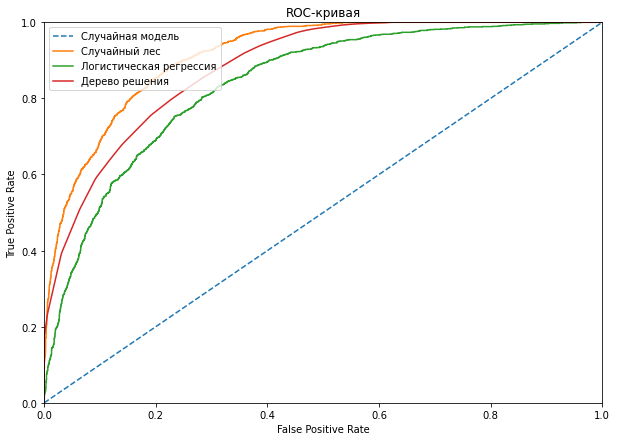

In [82]:
plt.figure()

plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr_rfc,tpr_rfc)
plt.plot(fpr_lr,tpr_lr)  #Так как не работает 
plt.plot(fpr_dtc,tpr_dtc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(('Случайная модель','Случайный лес','Логистическая регрессия',
            'Дерево решения'),
           loc= 'upper left') 
plt.show()


**Промежуточный итог:**

Наиболее подходащяя модель - случайный лес с методом 'balanced'

#### Тестирование модели

model_final = RandomForestClassifier(
    n_estimators=estim_best_rfc, max_depth=depth_best_rfc, random_state=RANDOM_STATE, class_weight='balanced')
model_final.fit(features_train, target_train)
prediction = model_final.predict(features_valid)

print('F1', f1_score(target_valid, prediction))
probabilities_valid = model_final.predict_proba(features_valid)[:, 1]
print("AUC-ROC", roc_auc_score(target_valid, probabilities_valid))

#REV02 не работает

predict_proba = GridSearchCV.best_estimator_.predict_proba(rev02_features_test_OHE)[:, 1]
print("AUC-ROC", roc_auc_score(rev02_target_test, predict_proba))
fpr_f, tpr_f, thresholds = roc_curve(rev02_target_test, predict_proba)

#Не работает
#probabilities_valid = model_rfc.best_params_.predict_proba(rev02_features_train_OHE)[:, 1]
probabilities_valid = model_rfc.predict_proba(rev02_features_test_OHE)[:, 1]
print("AUC-ROC-score", roc_auc_score(rev02_target_test, probabilities_valid))
fpr_f, tpr_f, thresholds = roc_curve(rev02_target_test, probabilities_valid)

In [83]:
probabilities_valid = model_rfc.best_estimator_.predict_proba(rev02_features_test_OHE)[:, 1]
print("AUC-ROC-score", roc_auc_score(rev02_target_test, probabilities_valid))
fpr_f, tpr_f, thresholds = roc_curve(rev02_target_test, probabilities_valid)

AUC-ROC-score 0.8834755369039778


<div class="alert alert-warning">
    <h2> Комментарий тимлида <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> когда будешь делать через кросс-валидацию, то обрати внимание:
       
predict_proba = grid_search_catboost.best_estimator_.predict_proba(....)[:, 1]  
    
----
    
Чтобы сделать предсказание выбранной моделью, которая уже обучена на всей train выборке с лучшими гиперпараметрами следует использовать best_estimator_)

<img src="https://i.postimg.cc/7P25q5Nw/image.png" align=left width=44, heigth=44>
<div class="alert alert-info">
    <b>  ⠀Вопрос - Мой комментарий -  rev02</b>


Не очень понимаю как работает
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий тимлида 2 <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b> тк тестирование, то в predict_proba нужно передавать тестовые данные - rev02_features_test_OHE.
    
Код работает:
    
`probabilities_valid = model_rfc.best_estimator_.predict_proba(rev02_features_test_OHE)[:, 1]
print("AUC-ROC-score", roc_auc_score(rev02_target_test, probabilities_valid))
fpr_f, tpr_f, thresholds = roc_curve(rev02_target_test, probabilities_valid)
`

<div class="alert alert-success">
<h2> Комментарий тимлида 3<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> доработано

In [84]:
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=0)
dummy_clf.fit(rev02_features_train_OHE, rev02_target_train)
dummy_clf.score(rev02_features_train_OHE, rev02_target_train)
probabilities_dummy = dummy_clf.predict_proba(rev02_features_test_OHE)[:, 1]
print("AUC-ROC =", roc_auc_score(rev02_target_test, probabilities_dummy))

AUC-ROC = 0.5


<div class="alert alert-block alert-danger">
<h2> Комментарий тимлида <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b> давай все импорты поднимем наверх, к остальным :)

<img src="https://emojio.ru/images/apple-b/2705.png" align=left width=44, heigth=44>
<div class="alert alert-info">
    <b>   Мой комментарий rev02</b>

Done
</div>

<div class="alert alert-success">
<h2> Комментарий тимлида 2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> доработано

model_final
prediction = model_final.predict(features_test)
print('F1', f1_score(target_test, prediction))

probabilities_valid = model_final.predict_proba(features_test)[:, 1]
print("AUC-ROC", roc_auc_score(target_test, probabilities_valid))
fpr_f, tpr_f, thresholds = roc_curve(target_test, probabilities_valid)

<Figure size 432x288 with 0 Axes>

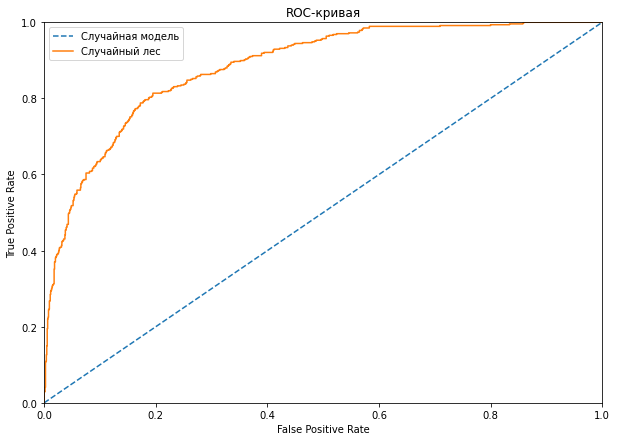

In [85]:
plt.figure()

plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr_f,tpr_f)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(('Случайная модель','Случайный лес'),
           loc= 'upper left') 
plt.show()

#### Проверка значимости признаков

##### RForest

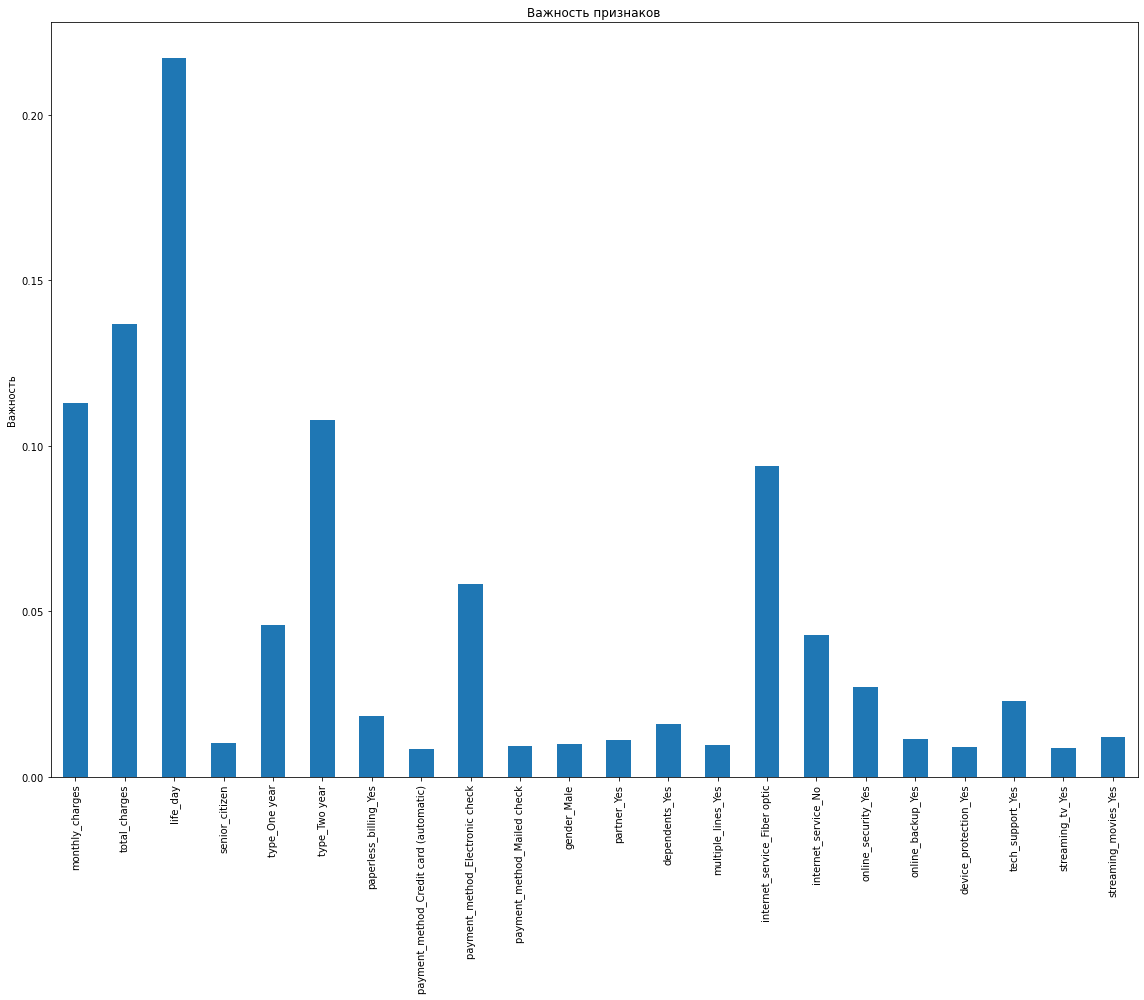

In [86]:
skl_imp = pd.Series(model_rfc.best_estimator_.feature_importances_,
                         rev02_features_train_OHE.columns)
fig, ax = plt.subplots(figsize=(16,14))
skl_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность')
fig.tight_layout()

<div class="alert alert-warning">
    <h2> Комментарий тимлида 2<a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> тк у тебя уже есть готовая модель, то можно использвать ее, ане создавать и обучать новую
        
`skl_imp = pd.Series(model_rfc.best_estimator_.feature_importances_,
                         rev02_features_train_OHE.columns)
fig, ax = plt.subplots(figsize=(16,14))
skl_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность')
fig.tight_layout()`

<img src="https://emojio.ru/images/apple-b/2705.png" align=left width=44, heigth=44>
<div class="alert alert-info">
    <b>   Мой комментарий rev03</b>

Done
</div>

<div class="alert alert-success">
<h2> Комментарий тимлида 3<a class="tocSkip"> </h2>

<b>Все отлично!👍</b>

##### CatBoost

model_cat = CatBoostClassifier()
model_cat.fit(rev02_features_train_OHE, rev02_target_train)

cat_imp = pd.Series(model_cat.get_feature_importance(), rev02_features_train_OHE.columns)
fig, ax = plt.subplots(figsize=(16,14))
cat_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")
fig.tight_layout()

<div class="alert alert-warning">
    <h2> Комментарий тимлида 2<a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> в проекте до этого омента не было CatBoostClassifier :) Выглядит немного странно, когда еще одна модель появляется только на этапе анализа признаков. 
        
        
CatBoost умеет работать с категориальными незакодированными признаками и использовать закодированные с ним не рекомендуется. Что бы все заработало надо передать в модель список названий категориальных признаков

<img src="https://emojio.ru/images/apple-b/2705.png" align=left width=44, heigth=44>
<div class="alert alert-info">
    <b>   Мой комментарий rev03</b>

Согласен, добавил решающее дерево. УБрал, catboost
</div>

<div class="alert alert-warning">
    <h2> Комментарий тимлида 3<a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> немного не поняла -  catboost все еще ячейкой выше, где тогда убрал? Я бы рекомендовала тогда совсем убрать из блокнота бустинг и выше и ниже, чтобы не путаться.

<div class="alert alert-success">
<h2> Комментарий тимлида 4<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> теперь поняла:) изменения вижу, хорошо

##### DTree

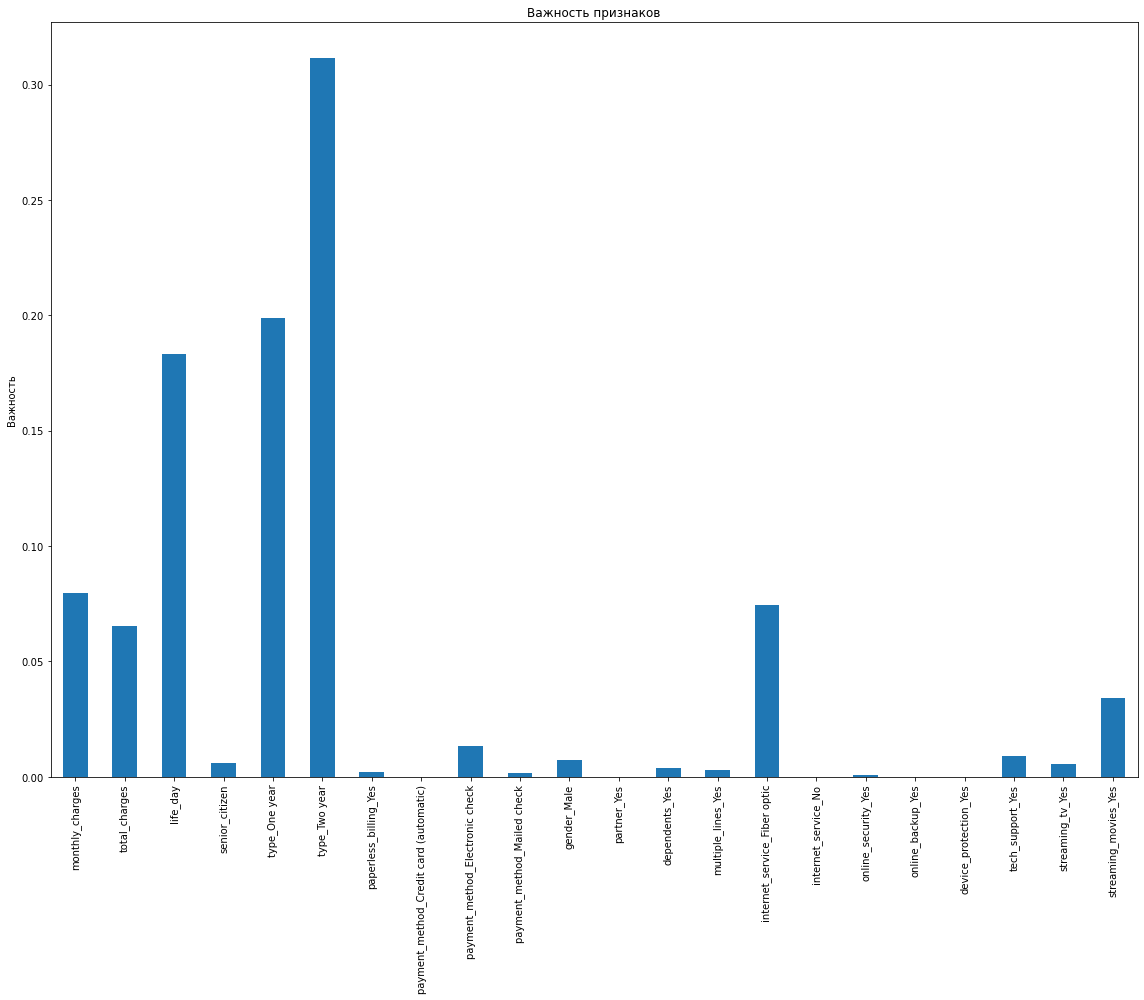

In [87]:
skl_imp = pd.Series(dtc_model_b.best_estimator_.feature_importances_,
                         rev02_features_train_OHE.columns)
fig, ax = plt.subplots(figsize=(16,14))
skl_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность')
fig.tight_layout()

##### Сводная

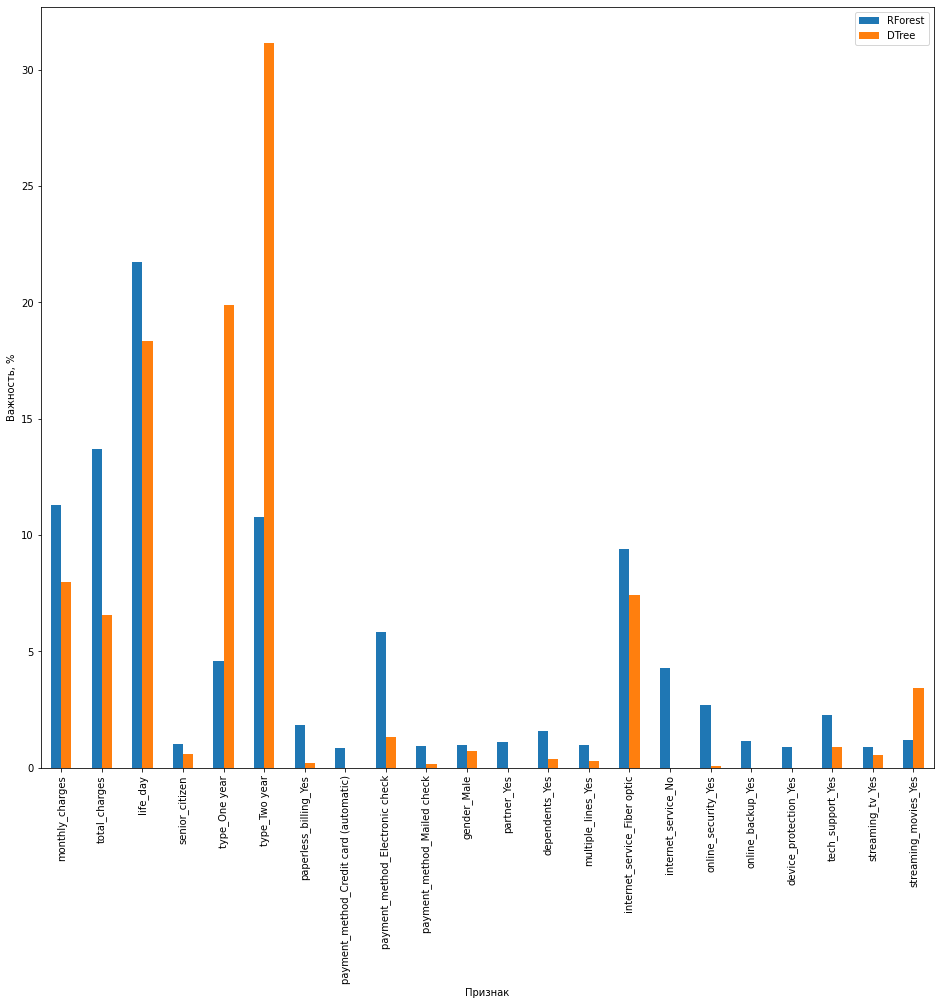

In [88]:
try:
    df_azp = pd.DataFrame({#'Catboost' : model_cat.get_feature_importance(),
                            'RForest' : 100*model_rfc.best_estimator_.feature_importances_,
                           'DTree' : 100*dtc_model_b.best_estimator_.feature_importances_
                          }, index=rev02_features_train_OHE.columns)
    fig, ax = plt.subplots(figsize=(16,14))
    ax = df_azp.plot.bar(ax=ax)
    ax.set_xlabel('Признак')
    ax.set_ylabel('Важность, %')
    plt.show()

except TypeError:
    print("Вылезает ошибка - TypeError: 'dict' object is not callable")

#TypeError: 'dict' object is not callable

**Промежуточный итог:**

Можно заметить, что для борльшинства признаков у разных моделей схожая значимость, однако у модели **DTree** сильно выбивается `life_day` и `tech_support_NO` (что странно), у **RandomForestClassifier** важнее оказались `monthly_charges` и `total_charges`



[Описание](#opisanie_df)

<div class="alert alert-block alert-danger">
<h2> Комментарий тимлида <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b> хорошо бы еще добавить анализ значимости признаков, понять на основе чего модель строит прогнозы и есть ли незначимые признаки, https://newtechaudit.ru/feature-importance-v-sklearn-i-catboost-na-primere-klassicheskih-datasetov/

<img src="https://emojio.ru/images/apple-b/2705.png" align=left width=44, heigth=44>
<div class="alert alert-info">
    <b>   Мой комментарий rev02</b>

Done
</div>

<div class="alert alert-success">
<h2> Комментарий тимлида 2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> доработано

<img src="https://emojio.ru/images/apple-b/2705.png" align=left width=44, heigth=44>
<div class="alert alert-info">
    <b>   Мой комментарий rev03</b>

Стала вылезать ошибка `TypeError: 'dict' object is not callable`, хотя все работало нормально

Уже несколько раз проверил :(
</div>

<div class="alert alert-success">
<h2> Комментарий тимлида 3<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Списки меняются немного по другому, след.код работает:
    
`df_azp = pd.DataFrame({'Catboost' : model_cat.get_feature_importance(),
                            'RForest' : 100*model_rfc.best_estimator_.feature_importances_,
                           'DTree' : 100*dtc_model_b.best_estimator_.feature_importances_
                          }, index=rev02_features_train_OHE.columns)
    fig, ax = plt.subplots(figsize=(16,14))
    ax = df_azp.plot.bar(ax=ax)
    ax.set_xlabel('Признак')
    ax.set_ylabel('Важность, %')
    plt.show()`

<img src="https://emojio.ru/images/apple-b/2705.png" align=left width=44, heigth=44>
<div class="alert alert-info">
    <b>   Мой комментарий rev03</b>

Спасибо, получилось!)
</div>

<div class="alert alert-success">
<h2> Комментарий тимлида 4<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> отлично:)

### ВЫВОД

В результате обучения модели можно сделать вывод что наиболее удачная модель с для борьбы с дисбалансом методом 'balanced', с использованием "случайного леса", полученный результат. Итоговое значение AUC-ROC > 0.88

Для обучения модели лучше всего использовать следующие параметры:
* Методом борьбы с дисбалансом = 'balanced'
* max_depth = 7
* min_samples_leaf = 5


In [89]:
print(f'{dtc_model_b.best_params_}')

{'max_depth': 7, 'min_samples_leaf': 5}


### Отчет

#### Ответы на вопросы:

* Какие пункты плана были выполнены, а какие — нет (поясните почему)?
    * Все этапы (пункты) [Плана](#plan) были выполнены. 
* Какие трудности возникли и как вы их преодолели?
    * Переделал обработку выборки после разбияния так как иначе может быть утечка данных
    * У нас ограниченное количество данных, по этой причине пришлось выполнять исследования с использованием кросс-валидации
    * Данные имееют сильные дисбаланс, по этой причине рассматривались различные варианты борьбы с дисбалансом
* Какие ключевые шаги в решении задачи выделили?
    * Выгрузил и обработал данные
    * Создал целевой и дополнительный признаки
    * Объединел данных и провел их анализ
    * Провел исследование различных моделей с учетом дисбаланса и без него
* Какая ваша итоговая модель и какое у неё качество?
    * Итоговая модель: 
        * "Случайный лес"
        * Методом борьбы с дисбалансом = 'balanced'
        * max_depth = 7
        * min_samples_leaf = 5
        * **Итоговое значение AUC-ROC = 0.883**

#### Признаки используемые в работе

* Объединенный датафрейм:
    * `type` – тип договора: ежемесячный, годовой и т.д,
    * `paperless_billing` – факт выставления счёта на электронную почту,
    * `payment_method` – способ оплаты,
    * `monthly_charges` – ежемесячные траты на услуги,
    * `total_charges` – всего потрачено денег на услуги.
    * `gender` - Пол
    * `senior_citizen` – наличие пенсионного статуса по возрасту,
    * `partner` – наличие супруга(и)
    * `dependents` – наличие иждивенцев. 
    * `internet_service` - Интернет. 
    * `online_security` - блокировка небезопасных сайтов
    * `online_backup` - облачное хранилище файлов для резервного копирования данных
    * `device_protection` - антивирус
    * `tech_support` - выделенная линия технической поддержки
    * `streaming_tv` - стриминговое телевидение
    * `streaming_movies` - каталог фильмов
    * `multiple_lines` – Телефон
* Добавленные признаки:
    * `life_day` - время жизни клиента, в днях
    

#### Предобработка данных:

* Создать целевой признак: формируется из EndDate в случае наличия даты 1 (отвалился) или 0 (клиент). 
* Преобразовать BeginDate и EndDate в формат даты после получения нового столбца (целевого признака) для построения времени жизни (`life_day`). 
* Создать новый столбец с датой, чтобы не ломать исходный (date_end)
* Пропусков в данных нет, но есть ' ' поэтому, чтобы преобразовать `total_charges` в числа `float` необходимо в них проставить значения. В случае если у пользователя не проставилась сумма, взять значение из стоимости тарифа.
* Посчитать количество дней активности пользователя (date_end - begin_date)
* Объединь данные в один датафрейм по custumer_id LEFT JOIN  
* Заполняем все пропуски после объединения, так как пользователь может использовать только одну из услуг (проставляя "No")

Выбранные признаки имеют различную важность, и это хорошо видно на графике ниже. Часть признаков были удалены, такие как дата начала контракта или id пользователя.

#### График важности признаков

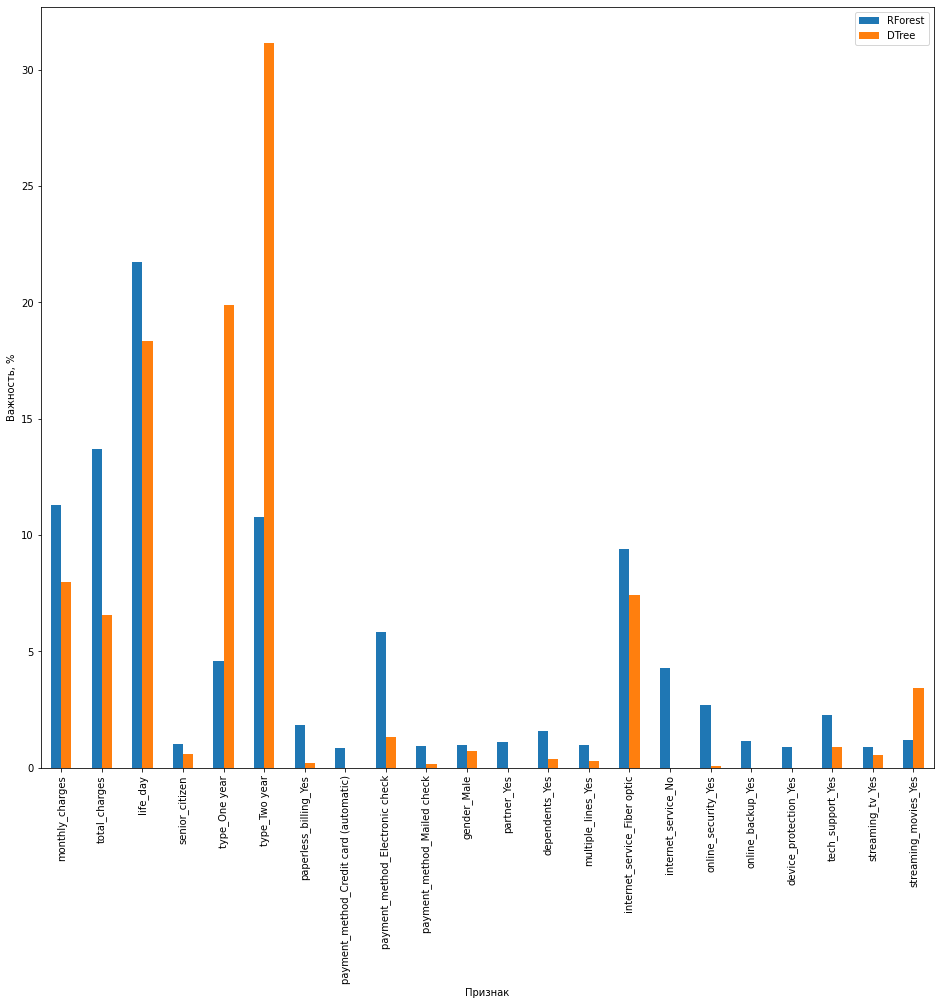

In [90]:
try:
    df_azp = pd.DataFrame({#'Catboost' : model_cat.get_feature_importance(),
                            'RForest' : 100*model_rfc.best_estimator_.feature_importances_,
                           'DTree' : 100*dtc_model_b.best_estimator_.feature_importances_
                          }, index=rev02_features_train_OHE.columns)
    fig, ax = plt.subplots(figsize=(16,14))
    ax = df_azp.plot.bar(ax=ax)
    ax.set_xlabel('Признак')
    ax.set_ylabel('Важность, %')
    plt.show()

except TypeError:
    print("Вылезает ошибка - TypeError: 'dict' object is not callable")

#### Сводня таблица всех моделей

In [93]:
am_df = [
        [0.83, "-"],
        [0.914, 0.883],
        [0.883, "-"]
        ]
model = ["Logistic Regression + CrossValScore", "RandomForestClassifier + GridSearchCV", "DecisionTreeRegresso + GridSearchCV"]

In [94]:
pd.DataFrame(data=am_df, index=model, columns=["ROC-AUC_train", "ROC-AUC_test"])

,ROC-AUC_train,ROC-AUC_test
Logistic Regression + CrossValScore,0.830,-
RandomForestClassifier + GridSearchCV,0.914,0.883
DecisionTreeRegresso + GridSearchCV,0.883,-


<Figure size 432x288 with 0 Axes>

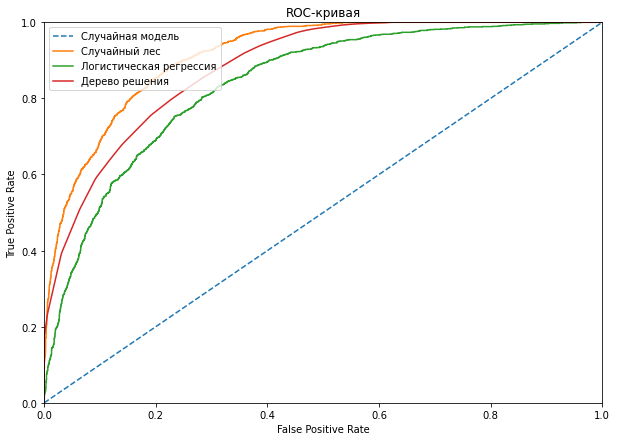

In [95]:
plt.figure()

plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr_rfc,tpr_rfc)
plt.plot(fpr_lr,tpr_lr)  #Так как не работает 
plt.plot(fpr_dtc,tpr_dtc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(('Случайная модель','Случайный лес','Логистическая регрессия',
            'Дерево решения'),
           loc= 'upper left') 
plt.show()


<div style="border:solid Chocolate 2px; padding: 40px"><h2>✔️ Заключение тимлида: <a class="tocSkip"> </h2> 
    
<b>Алескандр</b>, было приятно проверять твою работу, она почти готова, ты молодец! 
    
Данные из разных таблиц собраны в один датафрейм, удалены аномалии, заполнены пропуски, получены новые признаки, а ненужные признаки удалены). 
   
Положительные моменты: 
    
- грамотное и понятное оформление кода;
    
- аналитический подход — при удалении признаков и формировании новых написано соответствующее обоснование;
    
- исследованы разные подходу к дисбалансу классов;
    
    
На данном этапе нужно доработать:
    
- доработать анализ корреляций;
    
- перенести кодирование признаков после разбиения на выборки и проверить порядок и совпадение колонок для тренировочной и обучающей выборках;
    
- исправить расчет roc_auc;
    
- рекомендую делать подбор гиперпараметров через кросс-валидацию.
    
 
    
Если есть какие-то трудности, или нужны пояснения по проекту — смело пиши! Я постараюсь тебе помочь 😊

Жду твоего ответа!
    
</font>

<div style="border:solid Chocolate 2px; padding: 40px"><h2>✔️ Заключение тимлида 2: <a class="tocSkip"> </h2> 
    
<b>Алескандр</b>, хорошо, что сделал автоматизированную кросс-валидацию. По твоим вопросам - см. мои комментарии выше.

Нужно добавить анализ корреляций.

<div style="border:solid Chocolate 2px; padding: 40px"><h2>✔️ Заключение тимлида 3: <a class="tocSkip"> </h2> 
    
<b>Алескандр</b>, доработки критических ошибок приняты, отправляю, чтобы ты посмотрел комментарии по ошибкам кода и catboost.


Если эти моменты править не будешь, то просто отправь мне эту версию обратно и я зачту этот этап:)

<div style="border:solid Chocolate 2px; padding: 40px"><h2>✔️ Заключение тимлида 4: <a class="tocSkip"> </h2> 
    
<b>Алескандр</b>, теперь отлично, спасибо за доработки, молодец! По метрике ты получешь 6 sp, поздравляю! Можно приступать к отчету

<div style="border:solid Chocolate 2px; padding: 40px">

<h2>✔️ ЗФинальное заключение тимлида: <a class="tocSkip"> </h2> 
    
<b>Алескандр</b>, с отчетом теперь все хорошо! Работа получилась большой и полной, молодец! 
    
Поздравляю с получением диплома о новой специальности!!!!<br> 
    
Немного фидбека о твоей работе:
- доработки не только ошибок, но и рекомендации, что отражает качественный подход к работе;
- использование кросс-валидации и нескольких моделей обучения - супер;
- выводы по ходу работу и вывод свобдных данных.
    
Рекомендую разобраться с использованием пайплайнов, с ними легко предотвратить косвенную утечку данных. Тут можешь посмотреть <a href='https://habr.com/ru/company/ods/blog/322534/'>пример работы с ним</a>, а <a href='https://newtechaudit.ru/pipeline-v-rabote-s-dannymi/'>тут</a> почитать про пайплайны, <a href='https://scikit-learn.ru/6-1-pipelines-and-composite-estimators/'>адаптация официального руководства sklearn</a>.
    
Также можно поработать над аналитической частью -вывести графики в разрезе таргета, можно таким образом выявить типовой портрет ушедших и оставшихся клиентов.
    
Сейчас ты можешь доработать этот проект с учетом рекомендаций, удалить наши с тобой комментарии и добавить себе в портфолио — лучше это сделать в ближайшее время, пока все нюансы еще отложились в памяти.

Далее, хочу добавить некоторые ссылки на полезные ресурсы по машинному обучению:

https://academy.yandex.ru/handbook/ml/ онлайн-учебник от Школы анализа данных Яндекса, в котором описаны теоретические основы работы моделей машинного обучения;

https://www.youtube.com/watch?v=xl1fwCza9C8 познавательное видео по настройке модели CatBoost

https://habr.com/ru/company/ods/blog/322626/ на Habr можно закрепить свои знания, порешав задачи из цикла статей — Открытый курс машинного обучения

https://github.com/esokolov/ml-course-hse — на гитхаб есть репозиторий с задачами из курса по машинному обучению от Евгения Соколова, можно использовать как дополнительный материал для закрепления знаний.

https://habr.com/ru/company/avito/blog/571094/ — материалы по A/B тестам.

В некоторых компаниях при устройстве на работу или стажировку, например в Яндексе, нужно решить тест на алгоритмические задачи. По алгоритмам есть много разных курсов, платных и бесплатных. Можно попробовать Тренировки по Алгоритмам от Яндекса https://yandex.ru/yaintern/algorithm-training (бесплатно, хороший курс). Насколько знаю, у Практикума тоже есть курс по алгоритмам.
    
***
    
После окончания финального спринта у нас будет заключительная консультация, где мы сможем подвести итоги и обсудить несколько проектов. Есть возможность выступить перед сокурсиниками со своим проектам в zoom, напиши мне об этом в Пачку, если есть желание :)
    
Отчет принимаю и до встречи!
    
    
</font>